# Predicting Weight for Different Obesity Levels

## Description

![alt text](https://2thepoint.in/wp-content/uploads/2020/11/bmi-adult-fb-600x315-1.jpg)

The dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. In this project, we will analyse the body weight of the individuals for different obesity levels. We will use regression model to predict the weight of the individuals.

## Data Exploration

The dataset contains 17 attributes and 2111 records before preprocessing.
<pre>
VARIABLE DESCRIPTIONS:
1)  Gender                               Individual's Gender
                                         (Male;Female)
2)  Age                                  Individual's Age (Years)
3)  Height                               Individual's Height (Meters)
4)  Weight                               Individual's Weight (Kilograms)
5)  Family_history_with_overweight       Has a family member suffered or suffers from overweight?
                                         (Yes; No)
6)  High_calorie_food_consumption        Do you eat high caloric food frequently?
                                         (Yes; No)
7)  Frequency_of_vegetable_consumption   Do you usually eat vegetables in your meals?
                                         (Never; Sometimes; Always)
8)  Number_of_main_meals                 How many main meals do you have daily?
                                         (Between 1 and 2; Three; More than three)
9)  Consumption_of_meals_between_meals   Do you eat any food between meals?
                                         (No;Sometimes;Frequently;Always)
10) Frequency_of_Smoking                 Do you smoke?
                                         (Yes;No)
11) Consumption_of_water_daily           How much water do you drink daily?
                                         (Less than a liter; Between 1 and 2 L; More than 2 L)
12) Calorie_consumption_monitoring       Do you monitor the calories you eat daily?
                                         (Yes;No)
13) Physical_activity_frequency          How often do you have physical activity?
                                         (I do not have ; 1 or 2 days; 2 or 4 days; 4 or 5 days)
14) Time_using_technology_devices        How much time do you use technological devices?
                                         (0–2 hours; 3–5 hours; More than 5 hours)
15) Consumption_of_alchol                How often do you drink alcohol?
                                         (I do not drink; Sometimes; Frequently; Always)
16) Transportation_used                  Which transportation do you usually use?
                                         (Automobile; Motorbike; Bike; Public Transportation; Walking)
17) Obesity_level_category               Obesity Levels
                                         (Insufficient Weight; Normal Weight; Overweight Level I; Overweight Level II;
                                         Obesity Type I; Obesity Type II; Obesity Type III)  
</pre>

## Setup Imports and Variables

In [411]:
#Importing Setups
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

## Data Exploration

Read the data:

In [142]:
Obese_data = pd.read_csv('ObesityDataset.csv')
Obese_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,High_calorie_food_consumption,Frequency_of_vegetable_consumption,Number_of_main_meals,Consumption_of_meals_between_meals,Frequency_of_Smoking,Consumption_of_water_daily,Calorie_consumption_monitoring,Physical_activity_frequency,Time_using_technology_devices,Consumption_of_alchol,Transportation_used,Obesity_level_category
0,Female,21,1.62,64.0,yes,no,Sometimes,Three_meals,Sometimes,no,Between_one_and_two_L,no,No_activity,three_to_five_hours,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,NaN,Always,Three_meals,Sometimes,yes,More_than_two_L,yes,four_or_five_days,zero_to_two_hours,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,Sometimes,NaN,Sometimes,NaN,Between_one_and_two_L,no,two_or_four_days,three_to_five_hours,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,NaN,Always,Three_meals,NaN,no,Between_one_and_two_L,no,two_or_four_days,zero_to_two_hours,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,Sometimes,Between_one_and_two_meals,Sometimes,no,Between_one_and_two_L,no,No_activity,NaN,Sometimes,Public_Transportation,Overweight_Level_II


In [143]:
Obese_data.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,High_calorie_food_consumption,Frequency_of_vegetable_consumption,Number_of_main_meals,Consumption_of_meals_between_meals,Frequency_of_Smoking,Consumption_of_water_daily,Calorie_consumption_monitoring,Physical_activity_frequency,Time_using_technology_devices,Consumption_of_alchol,Transportation_used,Obesity_level_category
2106,Female,21,1.71,131.4,yes,yes,Always,Three_meals,Sometimes,no,NaN,no,two_or_four_days,three_to_five_hours,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.7,yes,yes,Always,Three_meals,Sometimes,no,Between_one_and_two_L,no,one_or_two_days,three_to_five_hours,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.7,yes,yes,Always,Three_meals,Sometimes,no,Between_one_and_two_L,no,one_or_two_days,three_to_five_hours,NaN,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.3,yes,yes,Always,Three_meals,Sometimes,no,More_than_two_L,no,one_or_two_days,three_to_five_hours,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,24,1.74,133.5,yes,yes,Always,Three_meals,Sometimes,no,More_than_two_L,no,one_or_two_days,three_to_five_hours,Sometimes,Public_Transportation,Obesity_Type_III


View the data types of each column:

In [144]:
Obese_data.dtypes

Gender                                 object
Age                                     int64
Height                                float64
Weight                                float64
family_history_with_overweight         object
High_calorie_food_consumption          object
Frequency_of_vegetable_consumption     object
Number_of_main_meals                   object
Consumption_of_meals_between_meals     object
Frequency_of_Smoking                   object
Consumption_of_water_daily             object
Calorie_consumption_monitoring         object
Physical_activity_frequency            object
Time_using_technology_devices          object
Consumption_of_alchol                  object
Transportation_used                    object
Obesity_level_category                 object
dtype: object

Data Information of each column:

In [145]:
Obese_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              2111 non-null   object 
 1   Age                                 2111 non-null   int64  
 2   Height                              2111 non-null   float64
 3   Weight                              2111 non-null   float64
 4   family_history_with_overweight      1966 non-null   object 
 5   High_calorie_food_consumption       1954 non-null   object 
 6   Frequency_of_vegetable_consumption  1963 non-null   object 
 7   Number_of_main_meals                1915 non-null   object 
 8   Consumption_of_meals_between_meals  1914 non-null   object 
 9   Frequency_of_Smoking                1965 non-null   object 
 10  Consumption_of_water_daily          1939 non-null   object 
 11  Calorie_consumption_monitoring      1926 no

Checking for duplicate values of the dataset

In [146]:
Obese_data.shape

(2111, 17)

View null values per column

In [147]:
#Null values per coloumns
Obese_data.isnull().sum()

Gender                                  0
Age                                     0
Height                                  0
Weight                                  0
family_history_with_overweight        145
High_calorie_food_consumption         157
Frequency_of_vegetable_consumption    148
Number_of_main_meals                  196
Consumption_of_meals_between_meals    197
Frequency_of_Smoking                  146
Consumption_of_water_daily            172
Calorie_consumption_monitoring        185
Physical_activity_frequency           150
Time_using_technology_devices         167
Consumption_of_alchol                 169
Transportation_used                   202
Obesity_level_category                  0
dtype: int64

# Descriptive Statistics

Next we'll explore descriptive statistics of numerical features

In [148]:
Obese_data.describe()

,Age,Height,Weight
count,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.585978
std,6.357078,0.093368,26.191165
min,14.000000,1.450000,39.000000
25%,20.000000,1.630000,65.450000
50%,23.000000,1.700000,83.000000
75%,26.000000,1.770000,107.450000
max,61.000000,1.980000,173.000000


In [149]:
Obese_data.corr()

,Age,Height,Weight
Age,1.000000,-0.025775,0.203443
Height,-0.025775,1.000000,0.462283
Weight,0.203443,0.462283,1.000000


Analysis: 

From the descriptive statistics we can see that the average age , weight and height of the individuals are 24.31 , 86.49 and 1.702 respectively. We can also observe that age with height is negatively correlated and age with weight is postively correlated. Hieght with weight is postively correlated with the highest correlation of 0.46676 

# Data Visualization

Plot distribution of age for different obesity levels

<IPython.core.display.Javascript object>


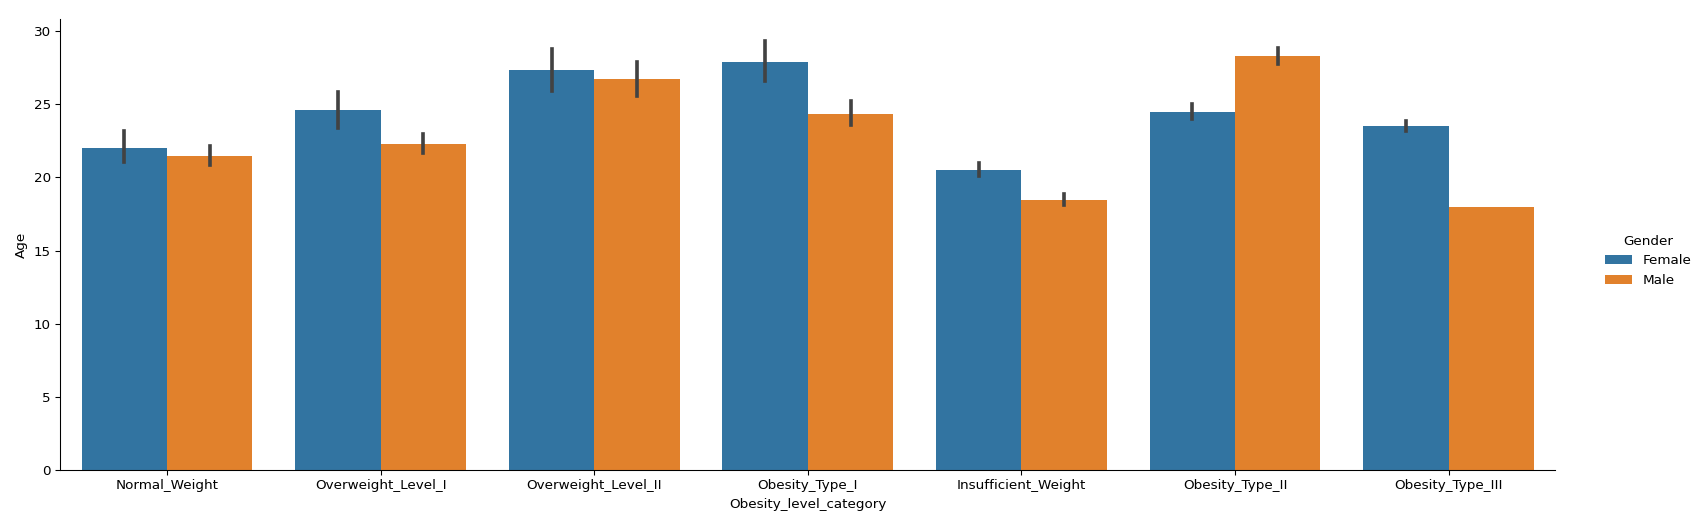

In [150]:
sns.catplot(x='Obesity_level_category', y='Age', hue ='Gender', data = Obese_data, kind='bar', height=4, aspect=3)

Analysis: 
We can see that females on an average are more overweight and obese as compared to males. Males have greater insufficient weight with respect to females and females have greater normal weight with respect to males.




Gender might play a role in determining the eating habits and lifestyle of an individuals.

<IPython.core.display.Javascript object>


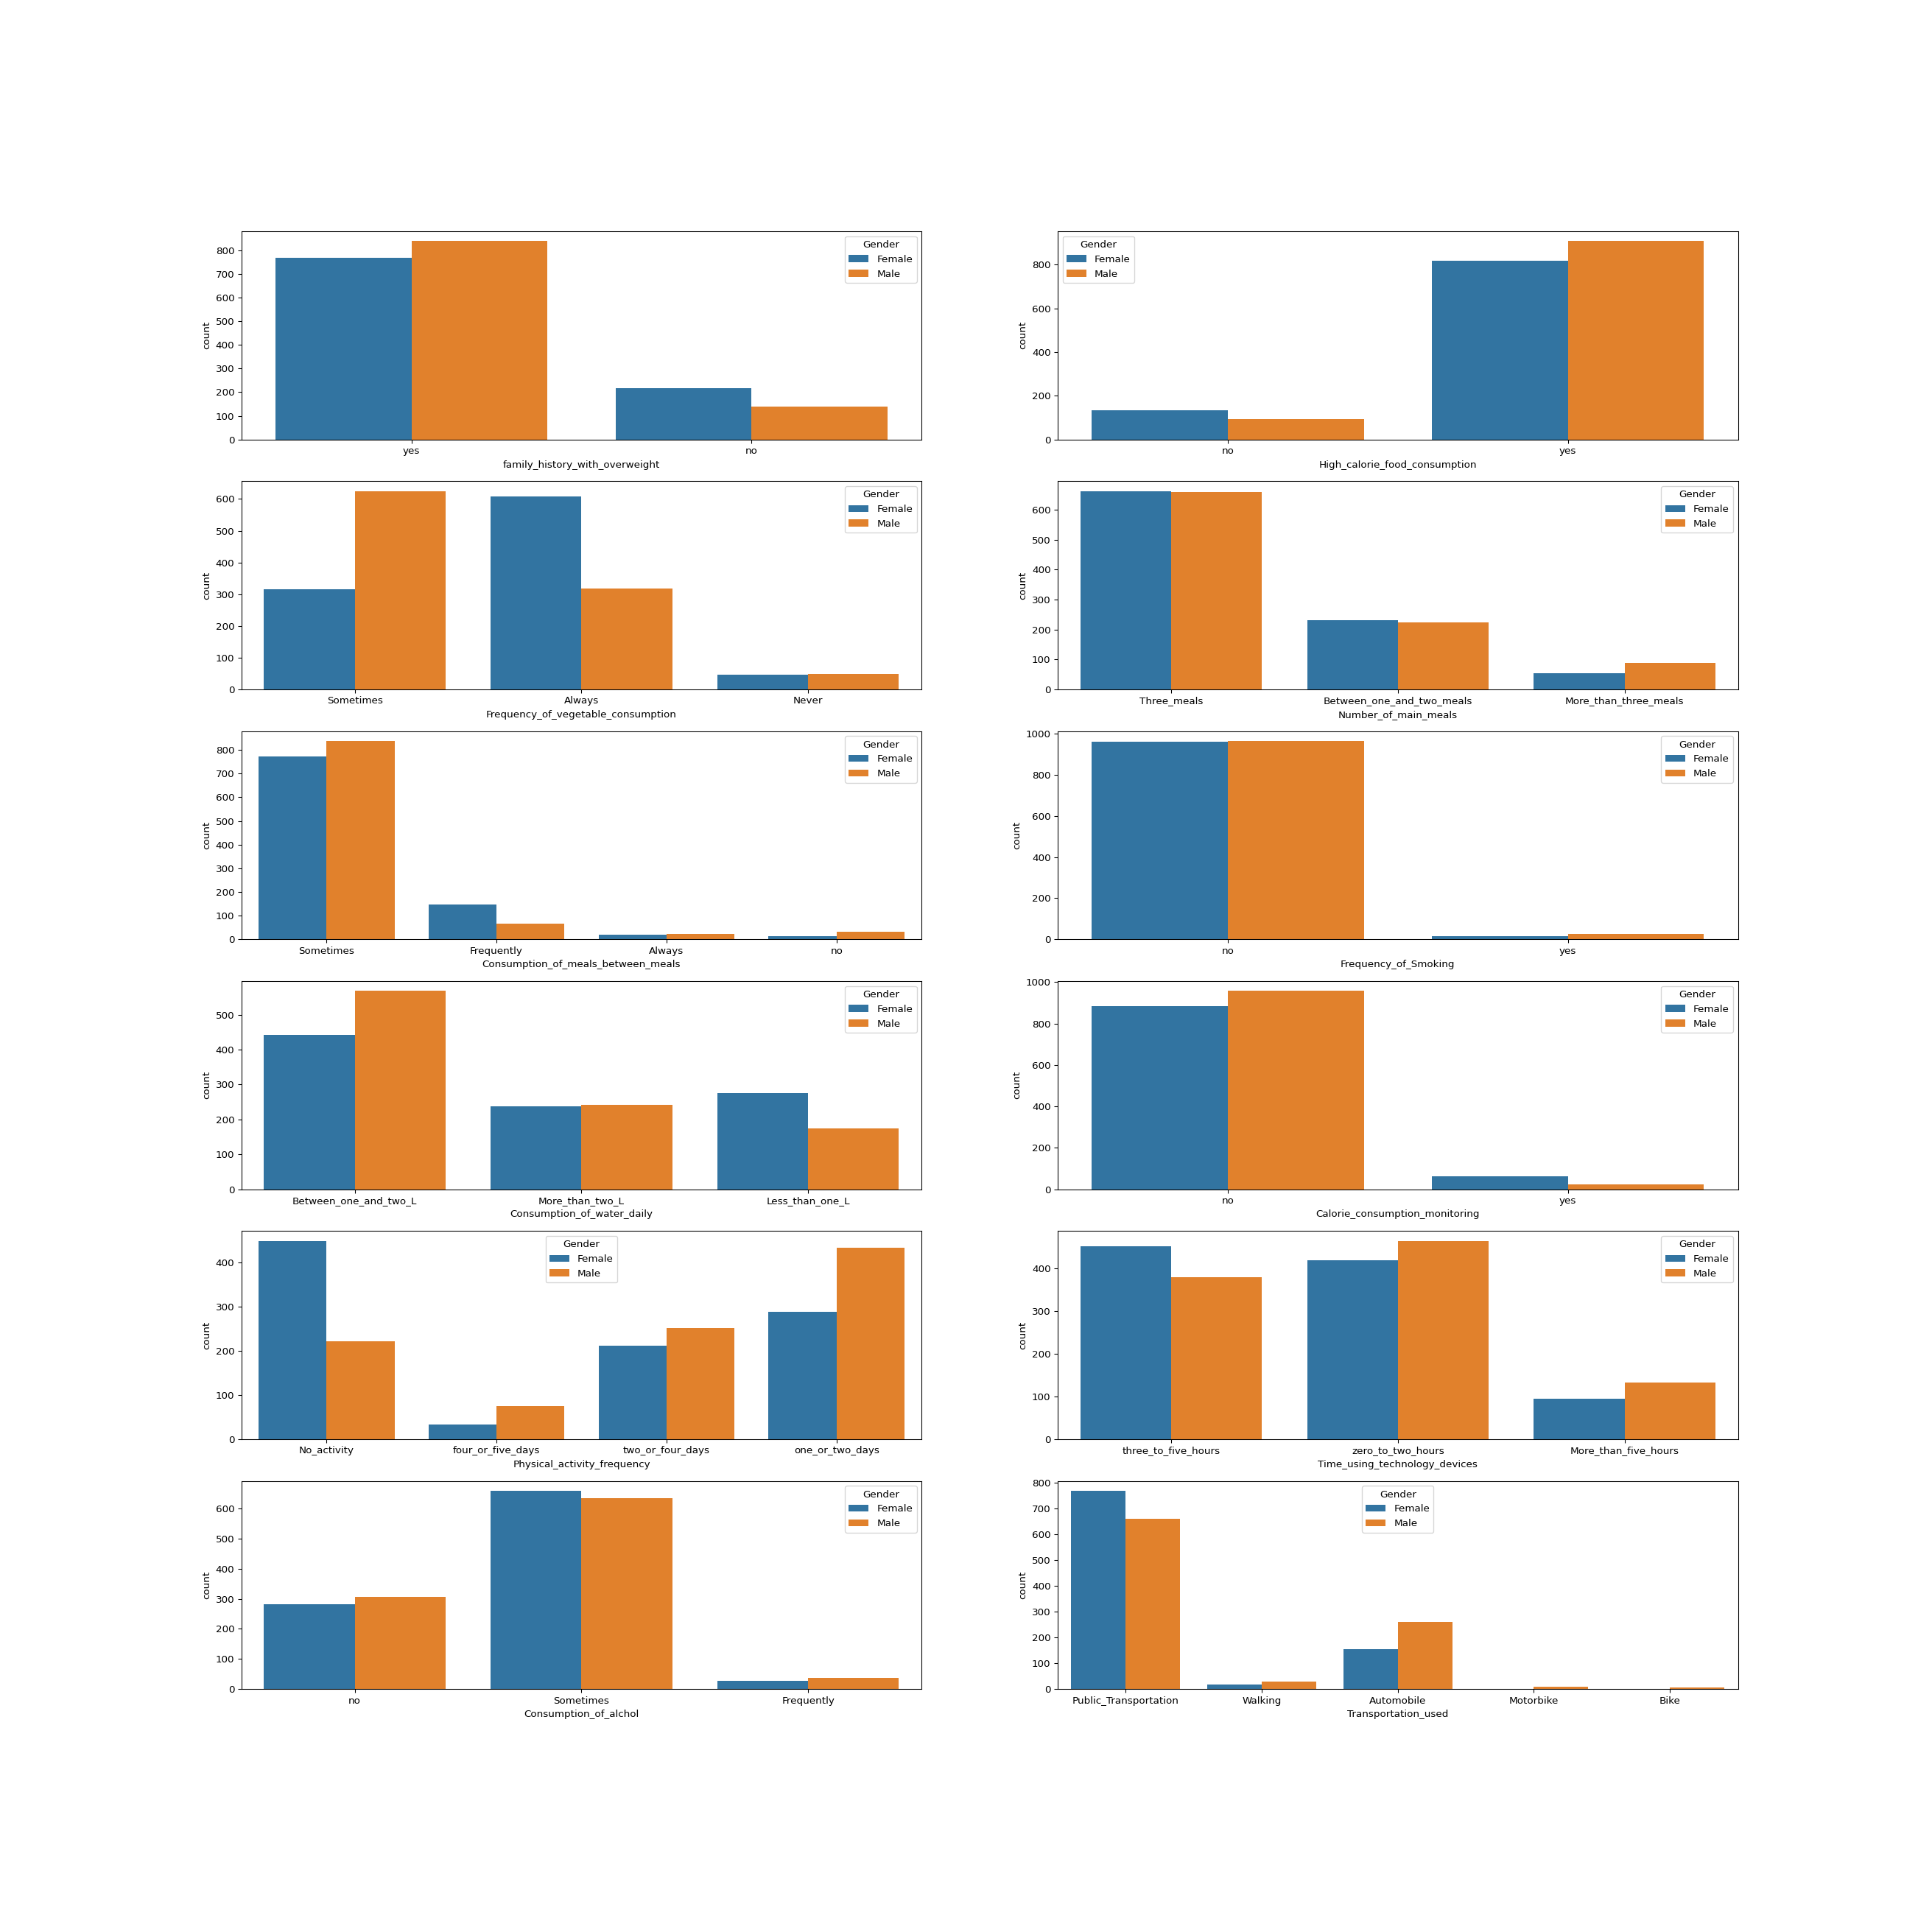

<AxesSubplot:xlabel='Transportation_used', ylabel='count'>

In [151]:
fig, axes =plt.subplots(6,2)
fig = plt.gcf()
fig.set_size_inches(20,20)
sns.countplot(x='family_history_with_overweight', data=Obese_data,ax=axes[0,0],hue= 'Gender')
sns.countplot(x='High_calorie_food_consumption', data=Obese_data,ax=axes[0,1],hue= 'Gender')
sns.countplot(x='Frequency_of_vegetable_consumption', data=Obese_data, ax=axes[1,0],hue= 'Gender')
sns.countplot(x='Number_of_main_meals', data=Obese_data,ax=axes[1,1],hue= 'Gender')
sns.countplot(x='Consumption_of_meals_between_meals', data=Obese_data,ax=axes[2,0],hue= 'Gender')
sns.countplot(x='Frequency_of_Smoking', data=Obese_data,ax=axes[2,1],hue= 'Gender')
sns.countplot(x='Consumption_of_water_daily', data=Obese_data,ax=axes[3,0],hue= 'Gender')
sns.countplot(x='Calorie_consumption_monitoring', data=Obese_data,ax=axes[3,1],hue= 'Gender')
sns.countplot(x='Physical_activity_frequency', data=Obese_data,ax=axes[4,0],hue= 'Gender')
sns.countplot(x='Time_using_technology_devices', data=Obese_data,ax=axes[4,1],hue= 'Gender')
sns.countplot(x='Consumption_of_alchol', data=Obese_data,ax=axes[5,0],hue= 'Gender')
sns.countplot(x='Transportation_used', data=Obese_data,ax=axes[5,1],hue= 'Gender')

Plot Heat Map to show the correlation between Age, Weight and Height.

<IPython.core.display.Javascript object>


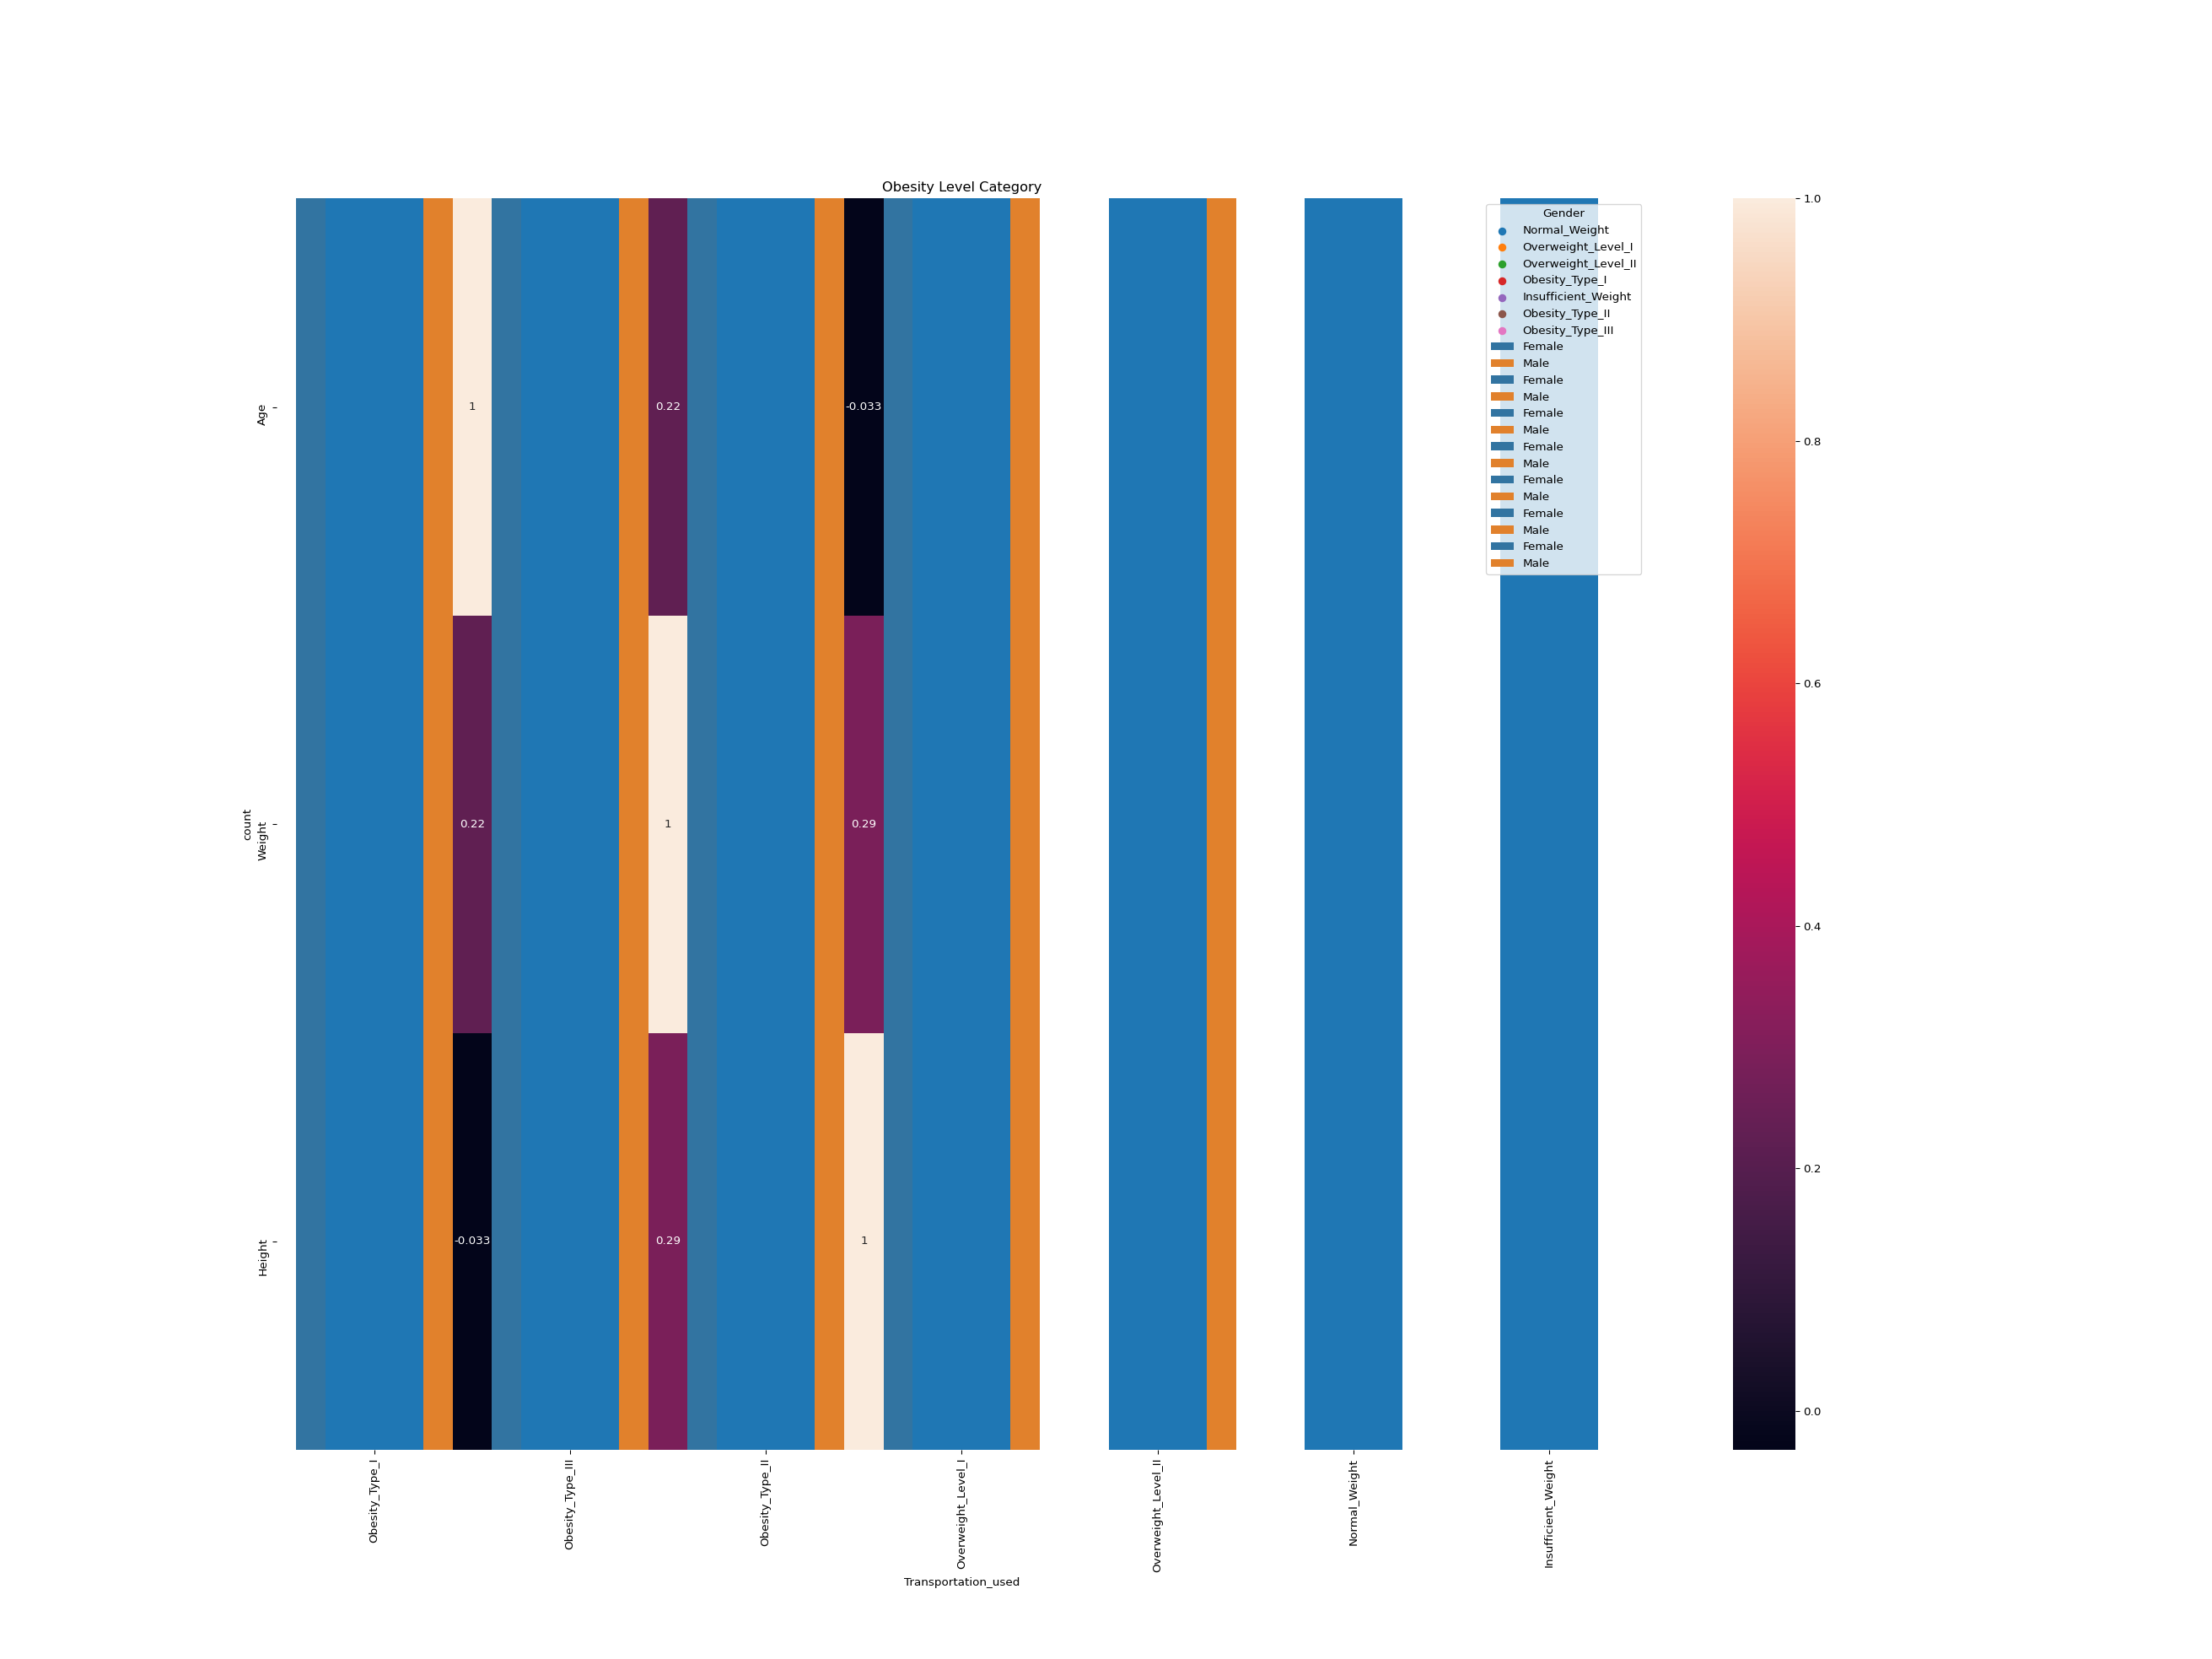

<AxesSubplot:>

In [152]:
corr = Obese_data[["Age","Weight","Height"]].corr(method='kendall')
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)

Analysis:
Highest correlation is between Weight and Height

Weight Based on Obesity levels

In [153]:
sns.scatterplot(x='Weight', y='Obesity_level_category', data=Obese_data)

<AxesSubplot:xlabel='Weight', ylabel='Obesity_level_category'>

Analysis:
Scatterplot above shows weight levels for different obesity category.

Weight based on Age

In [154]:
sns.scatterplot(x='Weight', y='Age', data=Obese_data)

<AxesSubplot:xlabel='Weight', ylabel='Obesity_level_category'>

Analysis: The plot shows that individuals with age group 0 to 30 have higher weight levels.

Obesity levels based on Weight and height 

In [155]:
sns.scatterplot(x='Weight', y='Height', data=Obese_data, hue='Obesity_level_category')

<AxesSubplot:xlabel='Weight', ylabel='Obesity_level_category'>

Analysis:
Weight along with the height plays a role in calculating the mass body index. The scatter plot above shows that for a particular weight if the height increases it affects the body index (Obesity Category).

# Data Preprocessing

## 1) Handling Missing Values

Columns having missing values

In [156]:
Obese_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              2111 non-null   object 
 1   Age                                 2111 non-null   int64  
 2   Height                              2111 non-null   float64
 3   Weight                              2111 non-null   float64
 4   family_history_with_overweight      1966 non-null   object 
 5   High_calorie_food_consumption       1954 non-null   object 
 6   Frequency_of_vegetable_consumption  1963 non-null   object 
 7   Number_of_main_meals                1915 non-null   object 
 8   Consumption_of_meals_between_meals  1914 non-null   object 
 9   Frequency_of_Smoking                1965 non-null   object 
 10  Consumption_of_water_daily          1939 non-null   object 
 11  Calorie_consumption_monitoring      1926 no

Analysis: Here we can see that columns family_history_with_overweight, High_calorie_food_consumption, Frequency_of_vegetable_consumption, Number_of_main_meals, Consumption_of_meals_between_meals, Frequency_of_Smoking, Consumption_of_water_daily, Calorie_consumption_monitoring, Physical_activity_frequency, Time_using_technology_devices,    Consumption_of_alchol, Transportation_used have missing values.             

1) family_history_with_overweight

In [157]:
sns.boxplot(x='family_history_with_overweight', y='Age', data=Obese_data)

<AxesSubplot:xlabel='family_history_with_overweight', ylabel='Age'>

It appears that given the age there are more individuals having family history with overweight. We assign the missing values in family_history_with_overweight to 'yes':

In [158]:
Obese_data['family_history_with_overweight'] = Obese_data['family_history_with_overweight'].fillna('yes')

Verify we do not have any more NaNs for family_history_with_overweight

In [159]:
Obese_data['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

2) High_calorie_food_consumption

In [160]:
sns.boxplot(x='High_calorie_food_consumption', y='Age', data=Obese_data)

<AxesSubplot:xlabel='High_calorie_food_consumption', ylabel='Age'>

It appears that given the age there are more individuals having high calorie food consumption. We assign the missing values in High_calorie_food_consumption to 'yes'.

In [161]:
Obese_data['High_calorie_food_consumption'] = Obese_data['High_calorie_food_consumption'].fillna('yes')

Verify we do not have any more NaNs for High_calorie_food_consumption

In [162]:
Obese_data['High_calorie_food_consumption'].unique()

array(['no', 'yes'], dtype=object)

3) Frequency_of_vegetable_consumption

In [163]:
sns.boxplot(x='Frequency_of_vegetable_consumption', y='Age', data=Obese_data)

<AxesSubplot:xlabel='Frequency_of_vegetable_consumption', ylabel='Age'>

When looking at the age by frequency of vegetable consumption graph we see that individuals who consumed vegetables sometimes were greater than the ones who consumed vegetables always which inturn was greater than the individuals who never consumed any vegetables. Since individuals on average consumed vegetables sometimes we will assign missing values in Frequency_of_vegetables_consumption to 'Sometimes'.

In [164]:
Obese_data['Frequency_of_vegetable_consumption'] = Obese_data['Frequency_of_vegetable_consumption'].fillna('Sometimes')

Verify we do not have any more NaNs for Frequency_of_vegetable_consumption

In [165]:
Obese_data['Frequency_of_vegetable_consumption'].unique()

array(['Sometimes', 'Always', 'Never'], dtype=object)

4) Number_of_main_meals

In [166]:
sns.boxplot(x='Number_of_main_meals', y='Age', data=Obese_data)

<AxesSubplot:xlabel='Number_of_main_meals', ylabel='Age'>

When looking at the age by number of main meals graph we see that individuals having three meals were greater than the ones having between one to two meals which inturn was greater than the individuals having more than three meals. Since individuals on average had three meals, we will assign missing values in Number_of_main_meals to 'Three_meals'.

In [167]:
Obese_data['Number_of_main_meals'] = Obese_data['Number_of_main_meals'].fillna('Three_meals')

Verify we do not have any more NaNs for Number_of_main_meals

In [168]:
Obese_data['Number_of_main_meals'].unique()

array(['Three_meals', 'Between_one_and_two_meals',
       'More_than_three_meals'], dtype=object)

5) Consumption_of_meals_between_meals

In [169]:
sns.boxplot(x='Consumption_of_meals_between_meals', y='Age', data=Obese_data)

<AxesSubplot:xlabel='Consumption_of_meals_between_meals', ylabel='Age'>

When looking at the age by consumption of meals between meals graph we see that individuals having meals sometimes was greater than the ones having meals frequently which inturn was greater than the individuals having meals always and only few individulas who never had meals between main meals. Since individuals on average had meals sometimes, we will assign missing values in Consumption_of_meals_between_meals to 'Somtimes'.

In [170]:
Obese_data['Consumption_of_meals_between_meals'] = Obese_data['Consumption_of_meals_between_meals'].fillna('Sometimes')

Verify we do not have any more NaNs for Consumption_of_meals_between_meals

In [171]:
Obese_data['Consumption_of_meals_between_meals'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

6) Frequency_of_Smoking

In [172]:
sns.countplot(x='Frequency_of_Smoking', data=Obese_data,hue= 'Gender')

<AxesSubplot:xlabel='Frequency_of_Smoking', ylabel='count'>

The plot above shows that the frequency of smoking for both males and females is less. We will fill in the missing values for frequency_of_smoking to 'no'.

In [173]:
Obese_data['Frequency_of_Smoking'] = Obese_data['Frequency_of_Smoking'].fillna('no')

Verify we do not have any more NaNs for Frequency_of_Smoking

In [174]:
Obese_data['Frequency_of_Smoking'].unique()

array(['no', 'yes'], dtype=object)

7) Consumption_of_water_daily

In [175]:
sns.countplot(x='Consumption_of_water_daily', data=Obese_data,hue= 'Gender')

<AxesSubplot:xlabel='Consumption_of_water_daily', ylabel='count'>

The plot shows that both females and males consumes water between one to two litres. Thus we can fill in the missing values for Consumption_of_water_daily to 'Between_one_and_two_L'.

In [176]:
Obese_data['Consumption_of_water_daily'] = Obese_data['Consumption_of_water_daily'].fillna('Between_one_and_two_L')

Verify we do not have any more NaNs for Consumption_of_water_daily

In [177]:
Obese_data['Consumption_of_water_daily'].unique()

array(['Between_one_and_two_L', 'More_than_two_L', 'Less_than_one_L'],
      dtype=object)

8) Calorie_consumption_monitoring

In [178]:
sns.countplot(x='Calorie_consumption_monitoring', data=Obese_data,hue= 'Gender')

<AxesSubplot:xlabel='Calorie_consumption_monitoring', ylabel='count'>

The plot shows that both females and males consumes less calories. Thus we can fill in the missing values for Calorie_consumption_monitoring to 'no'.

In [179]:
Obese_data['Calorie_consumption_monitoring'] = Obese_data['Calorie_consumption_monitoring'].fillna('no')

Verify we do not have any more NaNs for Calorie_consumption_monitoring

In [180]:
Obese_data['Calorie_consumption_monitoring'].unique()

array(['no', 'yes'], dtype=object)

8) Physical_activity_frequency

In [181]:
sns.countplot(x='Physical_activity_frequency', data=Obese_data,hue= 'Gender')

<AxesSubplot:xlabel='Physical_activity_frequency', ylabel='count'>

The bar plot shows that the females usually perform no physical activity and males usually perform physical activity for one or two days. We can fill in the missing values for Physical_activity_frequency as 'No_activity' for females and 'one_or_two_days' for males.

In [182]:
for i in Obese_data['Gender']:
    if i == 0:
        Obese_data['Physical_activity_frequency'] = Obese_data['Physical_activity_frequency'].fillna('No_activity')
    else:
        Obese_data['Physical_activity_frequency'] = Obese_data['Physical_activity_frequency'].fillna('one_or_two_days')

Verify we do not have any more NaNs for Physical_activity_frequency

In [183]:
Obese_data['Physical_activity_frequency'].unique()

array(['No_activity', 'four_or_five_days', 'two_or_four_days',
       'one_or_two_days'], dtype=object)

9) Time_using_technology_devices

In [184]:
sns.countplot(x='Time_using_technology_devices', data=Obese_data,hue= 'Gender')

<AxesSubplot:xlabel='Time_using_technology_devices', ylabel='count'>

The bar plot shows that the females usually spend three to five hours using devices and males spend zero to two hours using devices. We can fill in the missing values for Time_using_technology_devices as 'three_to_five_hours' for females and 'zero_to_two_hours' for males.

In [185]:
for i in Obese_data['Gender']:
    if i == 0:
        Obese_data['Time_using_technology_devices'] = Obese_data['Time_using_technology_devices'].fillna('three_to_five_hours')
    else:
        Obese_data['Time_using_technology_devices'] = Obese_data['Time_using_technology_devices'].fillna('zero_to_two_hours')

Verify we do not have any more NaNs for Time_using_technology_devices

In [186]:
Obese_data['Time_using_technology_devices'].unique()

array(['three_to_five_hours', 'zero_to_two_hours', 'More_than_five_hours'],
      dtype=object)

10) Consumption_of_alchol

In [187]:
sns.countplot(x='Consumption_of_alchol', data=Obese_data,hue= 'Gender')

<AxesSubplot:xlabel='Consumption_of_alchol', ylabel='count'>

The bar plot shows that the females and males consume alchol sometimes. So we can fill in the missing values for Consumption_of_alchol to 'Sometimes'.

In [188]:
Obese_data['Consumption_of_alchol'] = Obese_data['Consumption_of_alchol'].fillna('Sometimes')

Verify we do not have any more NaNs for Consumption_of_alchol

In [189]:
Obese_data['Consumption_of_alchol'].unique()

array(['no', 'Sometimes', 'Frequently'], dtype=object)

11) Transportation_used

In [190]:
sns.countplot(x='Transportation_used', data=Obese_data,hue= 'Gender')

<AxesSubplot:xlabel='Transportation_used', ylabel='count'>

The graph shows us that the males and females both use public transportation. We can fill in the missing values for Transportation_used to 'Public_Transportation'

In [191]:
Obese_data['Transportation_used'] = Obese_data['Transportation_used'].fillna('Public_Transportation')

Verify we do not have any more NaNs for Transportation_used

In [192]:
Obese_data['Transportation_used'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

Check if all the columns do not have missing values anymore

In [193]:
Obese_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Gender                              2111 non-null   object 
 1   Age                                 2111 non-null   int64  
 2   Height                              2111 non-null   float64
 3   Weight                              2111 non-null   float64
 4   family_history_with_overweight      2111 non-null   object 
 5   High_calorie_food_consumption       2111 non-null   object 
 6   Frequency_of_vegetable_consumption  2111 non-null   object 
 7   Number_of_main_meals                2111 non-null   object 
 8   Consumption_of_meals_between_meals  2111 non-null   object 
 9   Frequency_of_Smoking                2111 non-null   object 
 10  Consumption_of_water_daily          2111 non-null   object 
 11  Calorie_consumption_monitoring      2111 no

## 2) Handling Categorical/Ordinal values

Type 'object' is a string for pandas, which poses problems with machine learning algorithms. So to use this features, we'll need to convert these to categorical/ordinal values.

1) Gender:

In [194]:
Obese_data['Gender'].value_counts().plot(kind='bar', 
                                    title='Gender Counts')

<AxesSubplot:title={'center':'Gender Counts'}, xlabel='Transportation_used', ylabel='count'>

In [195]:
Obese_data['Gender'].value_counts()

Male      1068
Female    1043
Name: Gender, dtype: int64

Since males are greater in number as compared to females, we will map '0' to females and '1' to males.

In [196]:
Obese_data['Gender'] = Obese_data['Gender'].map({'Female':0, 'Male':1}).astype(int)

2) family_history_with_overweight

In [197]:
Obese_data['family_history_with_overweight'].value_counts().plot(kind='bar', 
                                    title='Family History With Overweight Counts')

<AxesSubplot:title={'center':'Family History With Overweight Counts'}, xlabel='Transportation_used', ylabel='count'>

Since individuals with family history of overweight are greater. We will map '0' to no and '1' to yes.

In [198]:
Obese_data['family_history_with_overweight'] = Obese_data['family_history_with_overweight'].map({'yes':1, 'no':0}).astype(int)

3) High_calorie_food_consumption

In [199]:
Obese_data['High_calorie_food_consumption'].value_counts().plot(kind='bar', 
                                    title=' High Calorie Food Consumption Counts')

<AxesSubplot:title={'center':' High Calorie Food Consumption Counts'}, xlabel='Transportation_used', ylabel='count'>

Since individuals consume high calorie food. We will map '0' to no and '1' to yes

In [200]:
Obese_data['High_calorie_food_consumption'] = Obese_data['High_calorie_food_consumption'].map({'yes':1, 'no':0}).astype(int)

4) Frequency_of_vegetable_consumption

In [201]:
Obese_data['Frequency_of_vegetable_consumption'].value_counts().plot(kind='bar', 
                                    title=' Frequency of Vegetable Consumption Counts')

<AxesSubplot:title={'center':' Frequency of Vegetable Consumption Counts'}, xlabel='Transportation_used', ylabel='count'>

Since there is a level for the vegetable consumption for the individuals this is an ordinal variable. We will map '0' to never, '1' to Always and '2' to Sometimes. 

In [202]:
Obese_data['Frequency_of_vegetable_consumption'] = Obese_data['Frequency_of_vegetable_consumption'].map({'Always':2, 'Sometimes':1, 'Never':0}).astype(int)

5) Number_of_main_meals

In [203]:
Obese_data['Number_of_main_meals'].value_counts().plot(kind='bar', 
                                    title='Main Meals Counts')

<AxesSubplot:title={'center':'Main Meals Counts'}, xlabel='Transportation_used', ylabel='count'>

Since individuals consuming three meals are greater than the ones consuming between one to two meals and individuals consuming more than three meals are the least. We will convert this in one hot vector of length 3.

In [204]:
cols = pd.get_dummies(Obese_data['Number_of_main_meals'], prefix= 'Number_of_main_meals')
Obese_data[cols.columns] = cols
Obese_data.drop('Number_of_main_meals', axis = 1, inplace = True)

6) Consumption_of_meals_between_meals

In [205]:
Obese_data['Consumption_of_meals_between_meals'].value_counts().plot(kind='bar', 
                                    title='Consumption of Meals Between Main Meals Counts')

<AxesSubplot:title={'center':'Consumption of Meals Between Main Meals Counts'}, xlabel='Transportation_used', ylabel='count'>

Since there is a level for consumption of meals between meals for the individuals this is an ordinal variable. We will map '0' to no, '3' to Always and '2' to Frequently and '1' to Sometimes.

In [206]:
Obese_data['Consumption_of_meals_between_meals'] = Obese_data['Consumption_of_meals_between_meals'].map({'Always':3,'Frequently':2, 'Sometimes':1, 'no':0}).astype(int)

7) Frequency_of_Smoking

In [207]:
Obese_data['Frequency_of_Smoking'].value_counts().plot(kind='bar', 
                                    title='Smoking Counts')

<AxesSubplot:title={'center':'Smoking Counts'}, xlabel='Transportation_used', ylabel='count'>

Since the individuals smoke less on average. We will map '1' to no and '0' to yes

In [208]:
Obese_data['Frequency_of_Smoking'] = Obese_data['Frequency_of_Smoking'].map({'yes':0, 'no':1}).astype(int)

8) Consumption_of_water_daily

In [209]:
Obese_data['Consumption_of_water_daily'].value_counts().plot(kind='bar', 
                                    title='Water Consumption Counts')

<AxesSubplot:title={'center':'Water Consumption Counts'}, xlabel='Transportation_used', ylabel='count'>

Since individuals consuming water between one and two litre are greater than the ones consuming more than two litre and individuals consuming less than one litre are the least. We will convert this in one hot vector of length 3

In [210]:
cols = pd.get_dummies(Obese_data['Consumption_of_water_daily'], prefix= 'Consumption_of_water_daily')
Obese_data[cols.columns] = cols
Obese_data.drop('Consumption_of_water_daily', axis = 1, inplace = True)

9) Calorie_consumption_monitoring

In [211]:
Obese_data['Calorie_consumption_monitoring'].value_counts().plot(kind='bar', 
                                    title='Calorie Consumption Counts')

<AxesSubplot:title={'center':'Calorie Consumption Counts'}, xlabel='Transportation_used', ylabel='count'>

Since individuals consume less calories on average we will map '1' to no and '0' to yes.

In [212]:
Obese_data['Calorie_consumption_monitoring'] = Obese_data['Calorie_consumption_monitoring'].map({'yes':0, 'no':1}).astype(int)

10) Physical_activity_frequency

In [213]:
Obese_data['Physical_activity_frequency'].value_counts().plot(kind='bar', 
                                    title='Physcial Activity Counts')

<AxesSubplot:title={'center':'Physcial Activity Counts'}, xlabel='Transportation_used', ylabel='count'>

Since individuals doing physical activity for one or two days are greater than the ones doing no activity which in turn is greater than the ones doing it for two or four days and individuals doing it for four or five days are the least. We will convert this in one hot vector of length 4

In [214]:
cols = pd.get_dummies(Obese_data['Physical_activity_frequency'], prefix= 'Physical_activity_frequency')
Obese_data[cols.columns] = cols
Obese_data.drop('Physical_activity_frequency', axis = 1, inplace = True)

11) Time_using_technology_devices

In [215]:
Obese_data['Time_using_technology_devices'].value_counts().plot(kind='bar', 
                                    title='Time Using Technology Devices Counts')

<AxesSubplot:title={'center':'Time Using Technology Devices Counts'}, xlabel='Transportation_used', ylabel='count'>

Since individuals spending zero to two hours are greater than the ones spending three to five hours and individuals spending more than five hours are the least. We will convert this in one hot vector of length 3

In [216]:
cols = pd.get_dummies(Obese_data['Time_using_technology_devices'], prefix= 'Time_using_technology_devices')
Obese_data[cols.columns] = cols
Obese_data.drop('Time_using_technology_devices', axis = 1, inplace = True)

12) Consumption_of_alchol

In [217]:
Obese_data['Consumption_of_alchol'].value_counts().plot(kind='bar', 
                                    title='Alchol Consumption Counts')

<AxesSubplot:title={'center':'Alchol Consumption Counts'}, xlabel='Transportation_used', ylabel='count'>

Since there is a level for consumption of alchol for the individuals this is an ordinal variable. We will map '0' to no, '2' to Frequently and '1' to Sometimes.

In [218]:
Obese_data['Consumption_of_alchol'] = Obese_data['Consumption_of_alchol'].map({'no':0, 'Sometimes':1, 'Frequently':2}).astype(int)

13) Transportation_used

In [219]:
Obese_data['Transportation_used'].value_counts().plot(kind='bar', 
                                    title='Transportation Used Counts')

<AxesSubplot:title={'center':'Transportation Used Counts'}, xlabel='Transportation_used', ylabel='count'>

We can see that mostly all individuals use public transportation. We will convert Transportation_used to one hot vector of length 5.

In [220]:
cols = pd.get_dummies(Obese_data['Transportation_used'], prefix= 'Transportation_used')
Obese_data[cols.columns] = cols
Obese_data.drop('Transportation_used', axis = 1, inplace = True)

14) Obesity_level_category

In [221]:
Obese_data['Obesity_level_category'].value_counts().plot(kind='bar', 
                                    title='Obesity Level Category')

<AxesSubplot:title={'center':'Obesity Level Category'}, xlabel='Transportation_used', ylabel='count'>

Since we have levels for the obesity this is an ordinal variable. We will map '0' to Insufficient Weight, '1' to Normal Weight, '2' to Overweight Level 1, '3' to Overweight Level 2, '4' to Obesity Type 1, '5' to Obesity Type 2 and '6' to Obesity Type 3.

In [222]:
Obese_data['Obesity_level_category'] = Obese_data['Obesity_level_category'].map({'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2,'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6}).astype(int)

Check if all the columns with data type as object are converted into numerical representations.

In [223]:
Obese_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Gender                                              2111 non-null   int32  
 1   Age                                                 2111 non-null   int64  
 2   Height                                              2111 non-null   float64
 3   Weight                                              2111 non-null   float64
 4   family_history_with_overweight                      2111 non-null   int32  
 5   High_calorie_food_consumption                       2111 non-null   int32  
 6   Frequency_of_vegetable_consumption                  2111 non-null   int32  
 7   Consumption_of_meals_between_meals                  2111 non-null   int32  
 8   Frequency_of_Smoking                                2111 non-null   int32  
 9

## 3) Data Split and Scaling

array([[<AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='Age', ylabel='Gender'>,
        <AxesSubplot:xlabel='Height', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Gender', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Height', ylabel='Age'>],
       [<AxesSubplot:xlabel='Gender', ylabel='Height'>,
        <AxesSubplot:xlabel='Age', ylabel='Height'>,
        <AxesSubplot:xlabel='Height', ylabel='Height'>]], dtype=object)

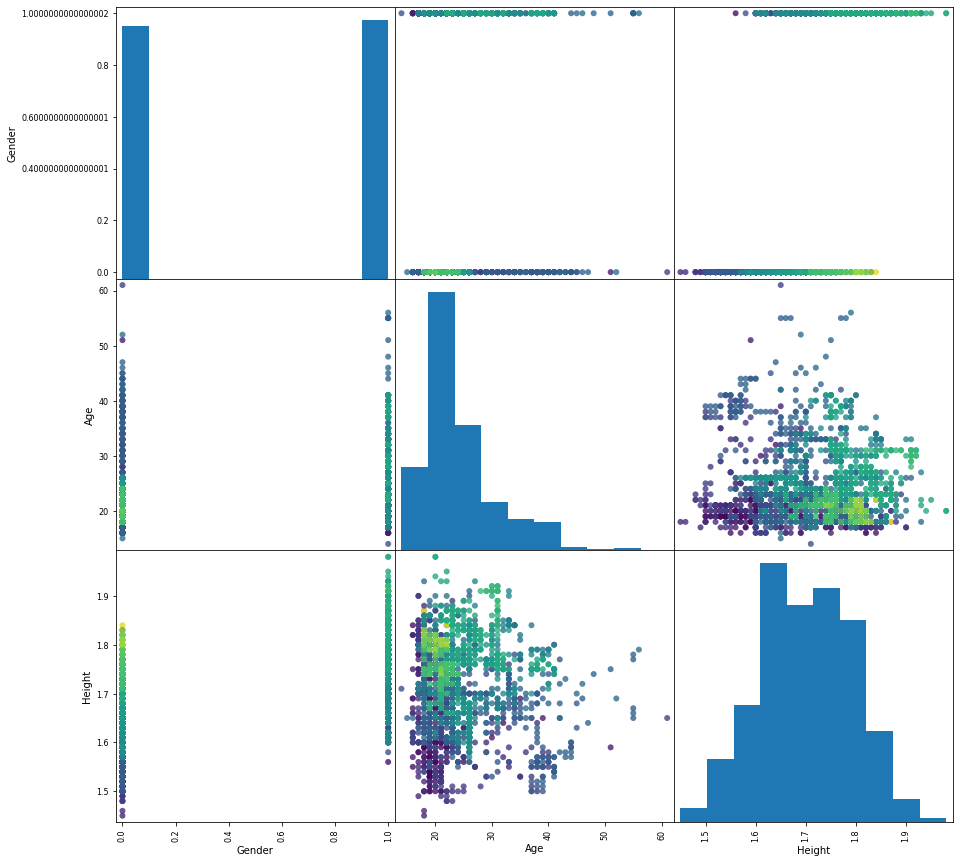

In [224]:
%matplotlib inline
from pandas.plotting import scatter_matrix

X = Obese_data.drop('Weight', axis = 1)
y = Obese_data['Weight']

attributes = X.columns[:3]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

As we can see that the distribution of the data is not normally distributed and also our dataset has more categorical values since the data set was survey based we will used Min-Max scaling instead of Standard Scaling. We use Standard Scaling when the data is assumed to be normally distributed which is not available here.

In [480]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = Obese_data.drop('Weight', axis = 1)
y = Obese_data['Weight']

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Data Modelling

## 1) Linear Regression

In [226]:
#linear Regression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()

scores_train = cross_val_score(lreg,X_train,y_train,scoring='r2',cv=5)
scores_test = cross_val_score(lreg,X_test,y_test,scoring='r2',cv=5)
y_pred = cross_val_predict(lreg, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_train))
print("Cross-validation scores: {}".format(scores_test))

Cross-validation scores: [0.95344016 0.91519433 0.93738214 0.85358701 0.66860507]
Cross-validation scores: [0.96223491 0.95802944 0.9541914  0.96074654 0.95131919]


In [227]:
print("Average cross-validation score for training dataset: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score for test dataset: {:.2f}".format(scores_test.mean()))
print('MSE: ',mean_squared_error(y_test, y_pred))

Average cross-validation score for training dataset: 0.87
Average cross-validation score for test dataset: 0.96
MSE:  30.446450830412832


Plotting Cross Validated Predictions

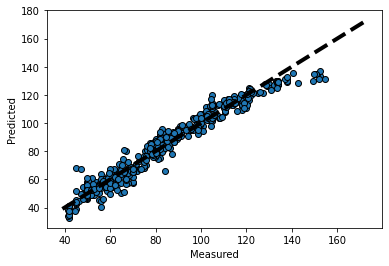

In [228]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

##  2) KNN Regressor

In [229]:
param_grid = {'n_neighbors': [1,3,5,9,11,15]}
print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
grid_search = GridSearchCV(KNeighborsRegressor(),param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'n_neighbors': [1, 3, 5, 9, 11, 15]}
Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.74


In [230]:
KNN = KNeighborsRegressor(3)

scores_train = cross_val_score(KNN,X_train,y_train)
scores_test = cross_val_score(KNN,X_test,y_test)
y_pred = cross_val_predict(KNN, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_train))
print("Cross-validation scores: {}".format(scores_test))

Cross-validation scores: [0.71642709 0.75763694 0.72231774 0.74185201 0.7717365 ]
Cross-validation scores: [0.56751106 0.64733223 0.7088315  0.4083338  0.70067372]


Text(0, 0.5, 'MSE')

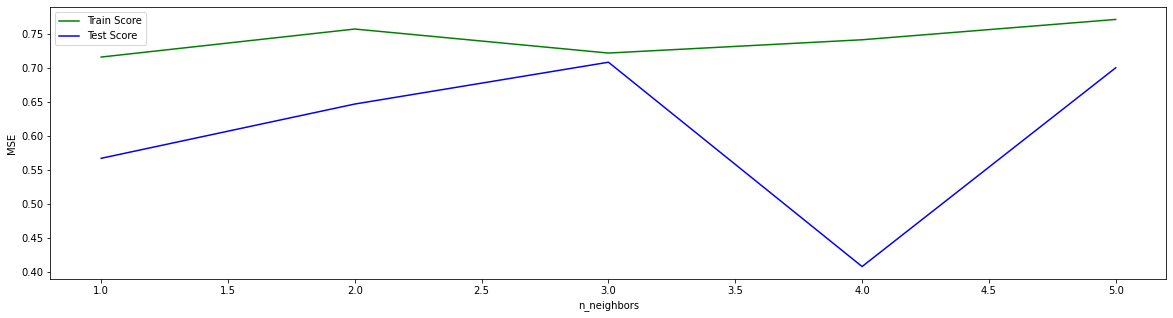

In [231]:
x_axis = range(1,6)
plt.subplots(figsize = (20,5))
plt.plot(x_axis, scores_train, c = 'g', label = 'Train Score')
plt.plot(x_axis, scores_test, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('MSE')

As we can see from the graph that the best parameter for n_neighbors is 3.0

In [232]:
print("Average cross-validation score for training dataset: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score for test dataset: {:.2f}".format(scores_test.mean()))
print('MSE: ',mean_squared_error(y_test, y_pred))

Average cross-validation score for training dataset: 0.74
Average cross-validation score for test dataset: 0.61
MSE:  275.53719907407407


Text(0.5, 0, 'HIEGHT')

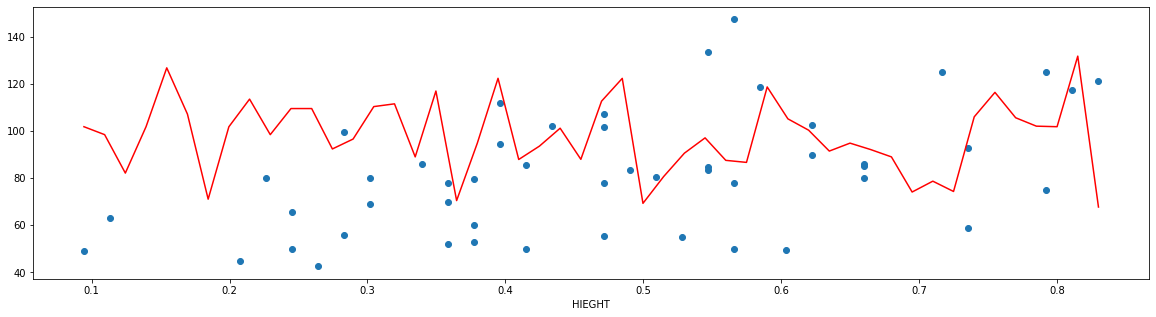

In [233]:
X_b = X_train[:50,2].reshape(-1,1)
y_b = y_train[:50]

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_pred = cross_val_predict(KNN, X_test[:50],y_test[:50],cv=5)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_pred, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('HIEGHT')

## 3) Ridge Regression

In [234]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
grid_search = GridSearchCV(Ridge(),param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'alpha': [0.01, 0.1, 1, 10, 100]}
Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.96


In [235]:
Ridge = Ridge(0.1)

scores_train = cross_val_score(Ridge,X_train,y_train)
scores_test = cross_val_score(Ridge,X_test,y_test)
y_pred = cross_val_predict(Ridge, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_train))
print("Cross-validation scores: {}".format(scores_test))

Cross-validation scores: [0.96515513 0.96124045 0.94537793 0.95720697 0.95079366]
Cross-validation scores: [0.96211229 0.95779418 0.95502743 0.96127412 0.95183558]


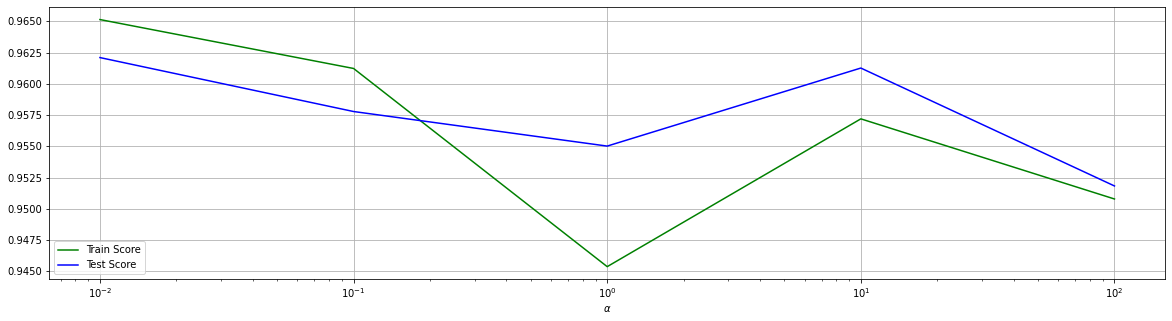

In [236]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, scores_train, c = 'g', label = 'Train Score')
plt.plot(x_range, scores_test, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

As we can see from the graph that the best parameter for alpha is 0.1

In [237]:
print("Average cross-validation score for training dataset: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score for test dataset: {:.2f}".format(scores_test.mean()))
print('MSE: ',mean_squared_error(y_test, y_pred))

Average cross-validation score for training dataset: 0.96
Average cross-validation score for test dataset: 0.96
MSE:  30.22188034408821


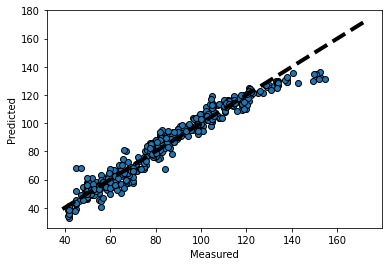

In [238]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## 4) Lasso Regression

In [239]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
grid_search = GridSearchCV(Lasso(),param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'alpha': [0.01, 0.1, 1, 10, 100]}
Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.96


In [240]:
Lasso = Lasso(0.01)

scores_train = cross_val_score(Lasso,X_train,y_train)
scores_test = cross_val_score(Lasso,X_test,y_test)
y_pred = cross_val_predict(Lasso, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_train))
print("Cross-validation scores: {}".format(scores_test))

Cross-validation scores: [0.96511285 0.96136727 0.94617803 0.95749662 0.9507505 ]
Cross-validation scores: [0.96327014 0.95739788 0.95590214 0.96064162 0.95355174]


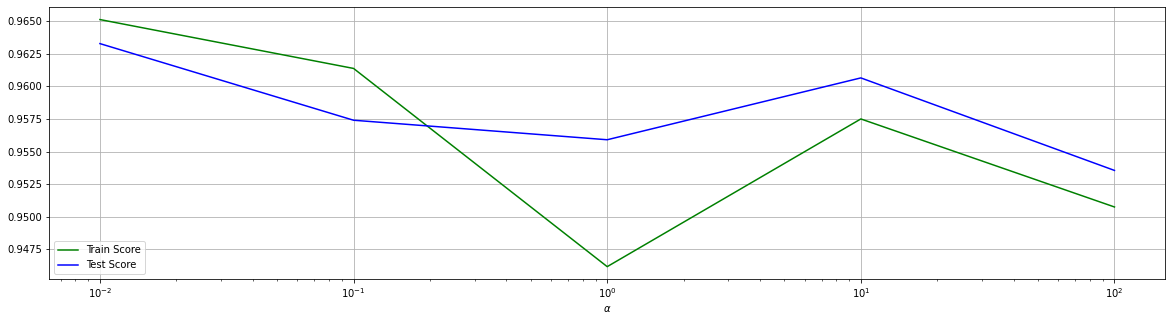

In [241]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, scores_train, c = 'g', label = 'Train Score')
plt.plot(x_range, scores_test, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

As we can see from the graph that the best parameter for alpha is 0.01

In [242]:
print("Average cross-validation score for training dataset: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score for test dataset: {:.2f}".format(scores_test.mean()))
print('MSE: ',mean_squared_error(y_test, y_pred))

Average cross-validation score for training dataset: 0.96
Average cross-validation score for test dataset: 0.96
MSE:  29.82627939336063


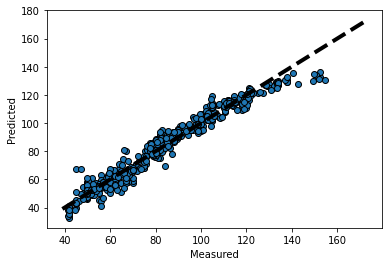

In [243]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## 5) Linear SVR

In [244]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter' : [100000]}
print("Parameter grid:\n{}".format(param_grid))
from sklearn.svm import LinearSVR
grid_search = GridSearchCV(LinearSVR(),param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100000]}
Best parameters: {'C': 100, 'max_iter': 100000}
Best cross-validation score: 0.95


In [245]:
LinearSVR = LinearSVR(C = 100, max_iter =  100000)

scores_train = cross_val_score(LinearSVR,X_train,y_train)
scores_test = cross_val_score(LinearSVR,X_test,y_test)
y_pred = cross_val_predict(LinearSVR, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_train))
print("Cross-validation scores: {}".format(scores_test))

Cross-validation scores: [0.96500141 0.95791309 0.945261   0.95430298 0.94564554]
Cross-validation scores: [0.96003411 0.94953583 0.95341267 0.9631417  0.94953384]


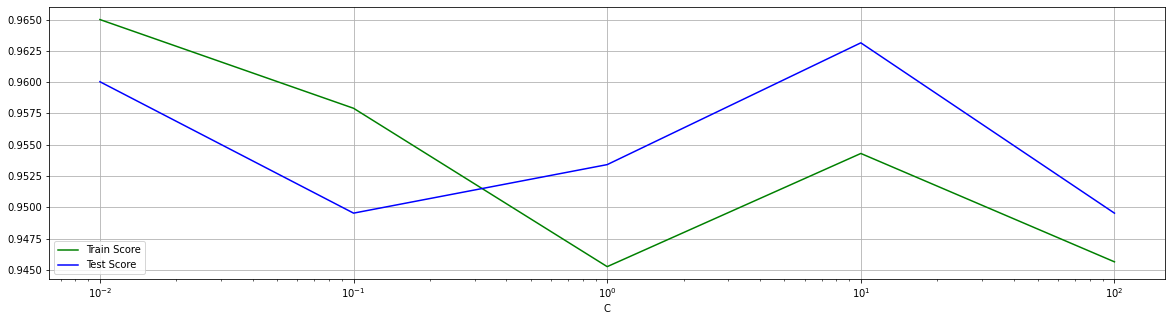

In [246]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, scores_train, c = 'g', label = 'Train Score')
plt.plot(x_range, scores_test, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')
plt.grid()

As we can see from the graph that the best parameter for C is 100

In [247]:
print("Average cross-validation score for training dataset: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score for test dataset: {:.2f}".format(scores_test.mean()))
print('MSE: ',mean_squared_error(y_test, y_pred))

Average cross-validation score for training dataset: 0.95
Average cross-validation score for test dataset: 0.96
MSE:  32.053007733500785


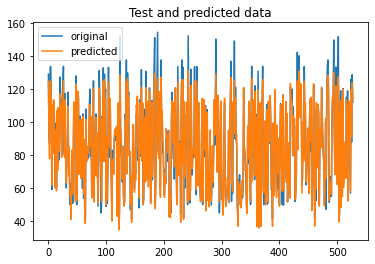

In [248]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

## 6) Regression - SVR (Kernel = 'Linear')

In [249]:
from sklearn.svm import SVR
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel' : ['linear']}
print("Parameter grid:\n{}".format(param_grid))
from sklearn.svm import LinearSVR
grid_search = GridSearchCV(SVR(),param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear']}
Best parameters: {'C': 100, 'kernel': 'linear'}
Best cross-validation score: 0.95


In [250]:
SVR = SVR(C = 100, kernel = 'linear')

scores_train = cross_val_score(SVR,X_train,y_train)
scores_test = cross_val_score(SVR,X_test,y_test)
y_pred = cross_val_predict(SVR, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_train))
print("Cross-validation scores: {}".format(scores_test))

Cross-validation scores: [0.965062   0.95794737 0.94515161 0.95465644 0.94572966]
Cross-validation scores: [0.95991143 0.95082493 0.95340291 0.96311232 0.95096596]


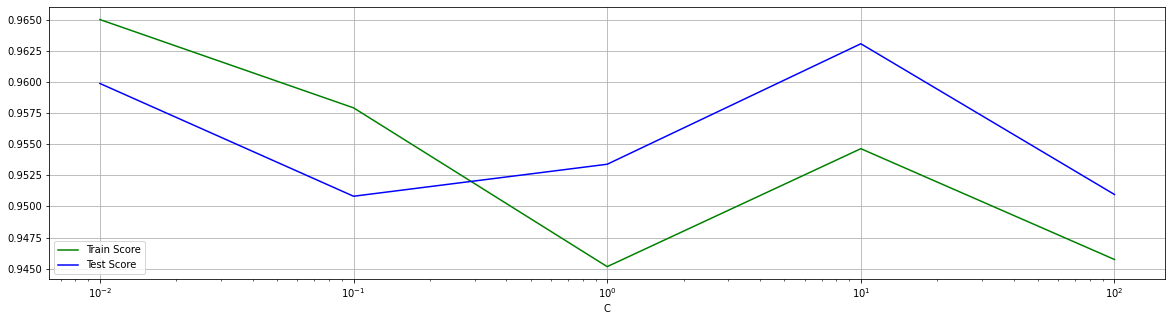

In [251]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, scores_train, c = 'g', label = 'Train Score')
plt.plot(x_range, scores_test, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')
plt.grid()

As we can see from the graph that the best parameter for C is 100

In [252]:
print("Average cross-validation score for training dataset: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score for test dataset: {:.2f}".format(scores_test.mean()))
print('MSE: ',mean_squared_error(y_test, y_pred))

Average cross-validation score for training dataset: 0.95
Average cross-validation score for test dataset: 0.96
MSE:  31.642132433249667


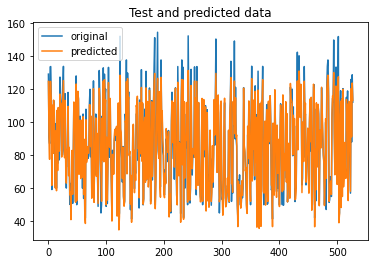

In [253]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

## 7) Regression - SVR (Kernel = 'Poly')

In [307]:
from sklearn.svm import SVR
param_grid = {'C': [0.1,1,10,100], 'kernel' : ['poly'], 'degree': [3] , 'coef0': [0,1]}
print("Parameter grid:\n{}".format(param_grid))
from sklearn.svm import LinearSVR
grid_search = GridSearchCV(SVR(),param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.1, 1, 10, 100], 'kernel': ['poly'], 'degree': [3], 'coef0': [0, 1]}
Best parameters: {'C': 10, 'coef0': 1, 'degree': 3, 'kernel': 'poly'}
Best cross-validation score: 0.97


In [308]:
SVR = SVR(C = 10, kernel = 'poly', coef0 = 1, degree = 3)

scores_train = cross_val_score(SVR,X_train,y_train)
scores_test = cross_val_score(SVR,X_test,y_test)
y_pred = cross_val_predict(SVR, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_train))
print("Cross-validation scores: {}".format(scores_test))

Cross-validation scores: [0.97169393 0.97466204 0.96396539 0.96936835 0.96745515]
Cross-validation scores: [0.96031477 0.97150711 0.97600737 0.96666872 0.9637878 ]


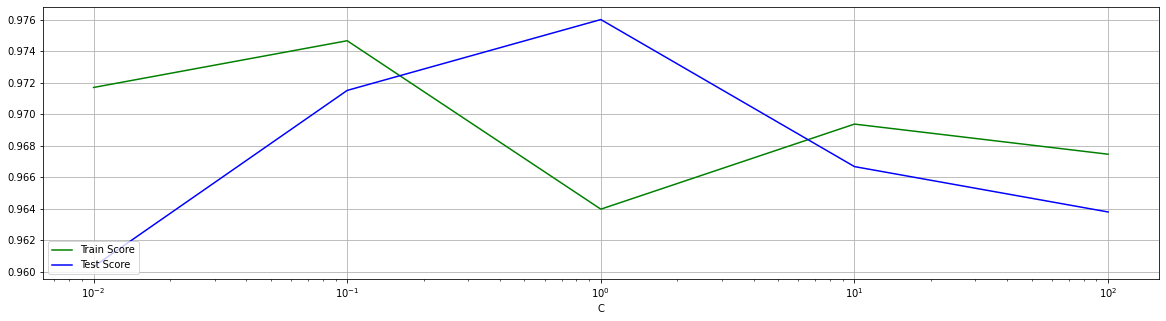

In [309]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,5))
plt.plot(x_range, scores_train, c = 'g', label = 'Train Score')
plt.plot(x_range, scores_test, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')
plt.grid()

As we can see from the graph that the best parameter for C is 10

In [257]:
print("Average cross-validation score for training dataset: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score for test dataset: {:.2f}".format(scores_test.mean()))
print('MSE: ',mean_squared_error(y_test, y_pred))

Average cross-validation score for training dataset: 0.97
Average cross-validation score for test dataset: 0.97
MSE:  22.791160745831306


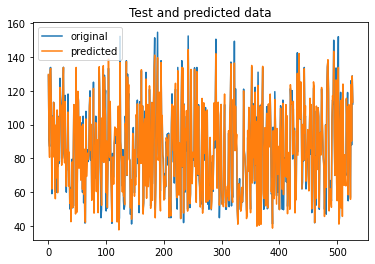

In [258]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

## 8) Regression - SVR (Kernel = 'rbf')

In [259]:
from sklearn.svm import SVR
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel' : ['rbf'] }
print("Parameter grid:\n{}".format(param_grid))
from sklearn.svm import LinearSVR
grid_search = GridSearchCV(SVR(),param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']}
Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [260]:
SVR = SVR(C = 100, gamma=0.1, kernel = 'rbf')

scores_train = cross_val_score(SVR,X_train,y_train)
scores_test = cross_val_score(SVR,X_test,y_test)
y_pred = cross_val_predict(SVR, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_train))
print("Cross-validation scores: {}".format(scores_test))

Cross-validation scores: [0.97200267 0.97513289 0.96326034 0.96858559 0.96627365]
Cross-validation scores: [0.96388453 0.9698062  0.97529288 0.96669471 0.97018342]


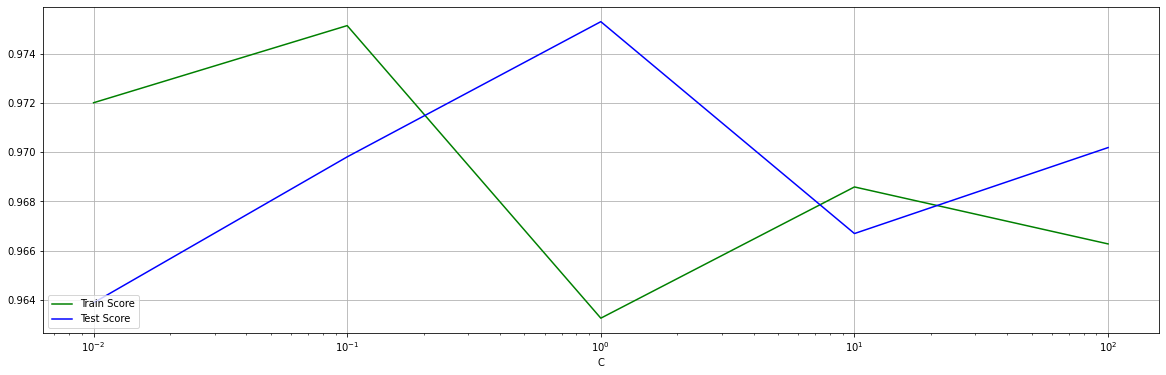

In [261]:
%matplotlib inline
import matplotlib.pyplot as plt

x_range = [0.01, 0.1, 1, 10, 100]

plt.subplots(figsize = (20,6))
plt.plot(x_range, scores_train, c = 'g', label = 'Train Score')
plt.plot(x_range, scores_test, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel('C')
plt.grid()

As we can see from the graph that the best parameter for C is 100

In [262]:
print("Average cross-validation score for training dataset: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score for test dataset: {:.2f}".format(scores_test.mean()))
print('MSE: ',mean_squared_error(y_test, y_pred))

Average cross-validation score for training dataset: 0.97
Average cross-validation score for test dataset: 0.97
MSE:  21.723132284115625


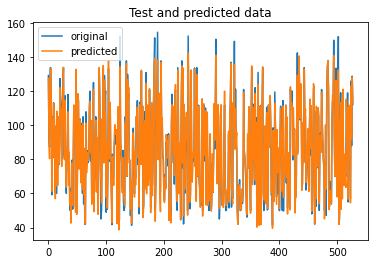

In [263]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

## 9) Decision Tree Regressor

In [292]:
from sklearn.tree import DecisionTreeRegressor
param_grid = { 'max_depth' : [2,4,6,8,10], 'min_samples_leaf':[10,11,12] }
print("Parameter grid:\n{}".format(param_grid))
grid_search = GridSearchCV(DecisionTreeRegressor(),param_grid, cv=5, return_train_score=True, n_jobs=4)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Parameter grid:
{'max_depth': [2, 4, 6, 8, 10], 'min_samples_leaf': [10, 11, 12]}
Best parameters: {'max_depth': 10, 'min_samples_leaf': 10}
Best cross-validation score: 0.98


In [293]:
DecisionTree = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 10, random_state = 0)

scores_train = cross_val_score(DecisionTree,X_train,y_train)
scores_test = cross_val_score(DecisionTree,X_test,y_test)
y_pred = cross_val_predict(DecisionTree, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_train))
print("Cross-validation scores: {}".format(scores_test))

Cross-validation scores: [0.97645029 0.97279229 0.95704029 0.97637756 0.98143047]
Cross-validation scores: [0.97218089 0.97513358 0.97102235 0.96006636 0.97666002]


In [294]:
print("Average cross-validation score for training dataset: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score for test dataset: {:.2f}".format(scores_test.mean()))
print('MSE: ',mean_squared_error(y_test, y_pred))

Average cross-validation score for training dataset: 0.97
Average cross-validation score for test dataset: 0.97
MSE:  20.448596932085945


Text(0.5, 0, 'HIEGHT')

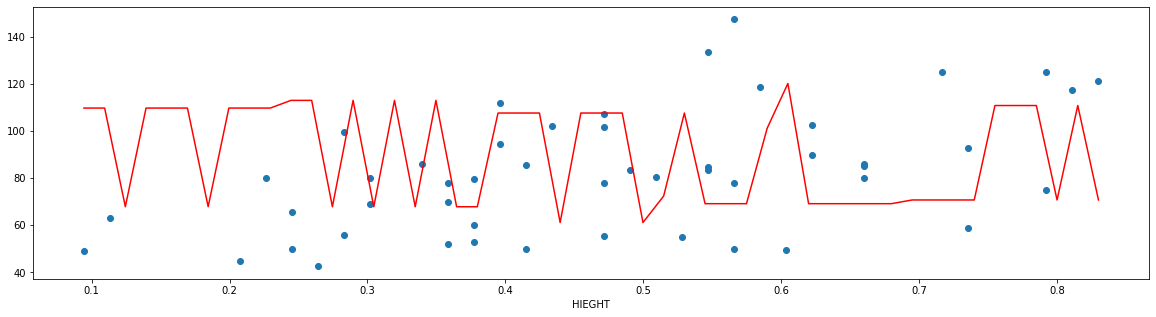

In [295]:
X_b = X_train[:50,2].reshape(-1,1)
y_b = y_train[:50]

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_pred = cross_val_predict(grid_search, X_test[:50],y_test[:50],cv=5)
plt.subplots(figsize = (20,5))
plt.plot(X_new, y_pred, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('HIEGHT')

## Best Parameter for every Regression Model


| Model | Best Parameters|
| --- | --- |
| Regression - KNN | N_Neighbors = 3 |
| Regression - Ridge | alpha = 0.1 |
| Regression - Lasso | alpha = 0.01 |
| Regression - LinearSVR |C = 100 |
| SVR Linear Kernel | C = 100 |
| SVR Poly Kernel| C = 10, Coef0 = 1|
| SVR RBF Kernel | C = 100 , Gamma = 0.1|
| Decision Tree Regressor | max_depth = 10 | 

## Performance on Dataset

| Model | Linear Regression | Regression - KNN | Regression - Ridge | Regression - Lasso | Regression - LinearSVR | SVR Linear  Kernel | SVR Poly Kernel | SVR RBF Kernel | Decision Tree Regressor |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Parameters| default | N_Neighbors = 3 | alpha = 0.1 |  alpha = 0.01 | C = 100 | C = 100 | C = 10, Coef0 = 1 | C = 100 , Gamma = 0.1 |max_depth = 10 | 
| Training Score | 0.94 | 0.74 | 0.96 | 0.96 | 0.95 | 0.95 | 0.97 | 0.97 | 0.98 |
| Test Score | 0.94 | 0.61 | 0.96 | 0.96 | 0.96 |  0.96 | 0.97 | 0.97 | 0.97 |
| MSE | 42.943 | 275.537 | 30.221 |  29.826 | 32.000 | 31.643 | 22.791| 21.723 | 20.448

## Fitting the best regression model

After comparing the performance of all models in training and testing datasets, we see that Decision Tree Regressor have the lowest MSE score and the best model for predicting this dataset.
All the models fit the data fairly well with the test score range from 0.94-0.98. KNN has the lowest performance with MSE of 275.537. This means on an average there is an error 276 kgs between the actual and the predicted values.

## 1) Decision Tree Regressor

In [296]:
scores_train = cross_val_score(DecisionTree,X_train,y_train)
scores_test = cross_val_score(DecisionTree,X_test,y_test)
y_pred = cross_val_predict(DecisionTree, X_test,y_test,cv=5)
print("Cross-validation scores: {}".format(scores_train))
print("Cross-validation scores: {}".format(scores_test))
print("Average cross-validation score for training dataset: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score for test dataset: {:.2f}".format(scores_test.mean()))
print('MSE: ',mean_squared_error(y_test, y_pred))

Cross-validation scores: [0.97645029 0.97279229 0.95704029 0.97637756 0.98143047]
Cross-validation scores: [0.97218089 0.97513358 0.97102235 0.96006636 0.97666002]
Average cross-validation score for training dataset: 0.97
Average cross-validation score for test dataset: 0.97
MSE:  20.448596932085945


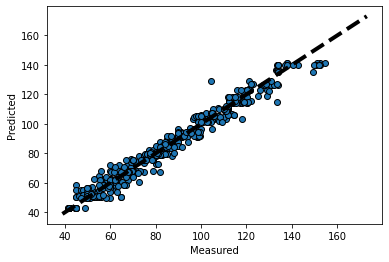

In [297]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## PROJECT - II

In [324]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Bagging for Decision Tree Regressor

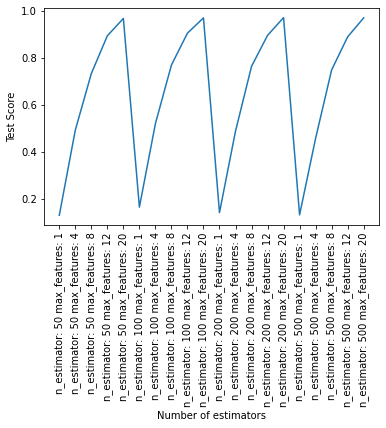

In [325]:
n_estimators = [50,100,200,500]
max_features = [1,4,8,12,20]
params=[]
scores = []

for estimator in n_estimators:
    for features in max_features:
        reg = BaggingRegressor(DecisionTreeRegressor(), \
                                max_samples=0.5, \
                                max_features=features, \
                                n_estimators=estimator, \
                               bootstrap=True, random_state=0, oob_score=True)
        reg.fit(X_train, y_train)
        score = reg.score(X_test, y_test)
        params.append("n_estimator: "+str(estimator)+" max_features: "+str(features))
        scores.append(score)
    
plt.plot(params, scores)
plt.xlabel("Number of estimators")
plt.xticks(rotation=90)
plt.ylabel("Test Score")
plt.show()

In [326]:
tuned_parameters = {"n_estimators": [50,100,200,500],
              "max_features":[1,4,8,12,20],
              "max_samples": [0.5,0.1],
            }
DecisionTree_reg = DecisionTreeRegressor()

DecisionTree_grid = GridSearchCV(BaggingRegressor(DecisionTree,bootstrap=True, oob_score=True, random_state=0),tuned_parameters)
DecisionTree_grid_model= DecisionTree_grid.fit(X_train, y_train)

print("DecisionTree grid model Best params: ")
print(DecisionTree_grid_model.best_params_)

print('Train Score: ',DecisionTree_grid_model.score(X_train, y_train))
print('Test Score: ',DecisionTree_grid_model.score(X_test, y_test))
y_pred = DecisionTree_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

DecisionTree grid model Best params: 
{'max_features': 20, 'max_samples': 0.5, 'n_estimators': 200}
Train Score:  0.9603098119138538
Test Score:  0.958209683750542
MSE:  29.99347296717206


## Bagging for Ridge Regression

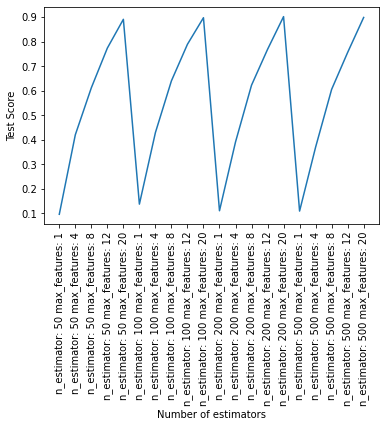

In [327]:
n_estimators = [50,100,200,500]
max_features = [1,4,8,12,20]
params=[]
scores = []

for estimator in n_estimators:
    for features in max_features:
        reg = BaggingRegressor(Ridge(max_iter=1000,alpha=1,tol=0.1,random_state=0), \
                                max_samples=0.5, \
                                max_features=features, \
                                n_estimators=estimator, \
                               bootstrap=True, random_state=0, oob_score=True)
        reg.fit(X_train, y_train)
        score = reg.score(X_test, y_test)
        params.append("n_estimator: "+str(estimator)+" max_features: "+str(features))
        scores.append(score)
    
plt.plot(params, scores)
plt.xlabel("Number of estimators")
plt.xticks(rotation=90)
plt.ylabel("Test Score")
plt.show()

In [328]:
tuned_parameters = {"n_estimators": [50,100,200,500],
              "max_features":[1,4,8,12,20],
              "max_samples": [0.5,0.1],
            }
Ridge_reg = Ridge(max_iter=1000,alpha=1,tol=0.1,random_state=0)

Ridge_reg_grid = GridSearchCV(BaggingRegressor(Ridge_reg,bootstrap=True, oob_score=True, random_state=0),tuned_parameters)
Ridge_reg_grid_model= Ridge_reg_grid.fit(X_train, y_train)

print("Ridge grid model Best params: ")
print(Ridge_reg_grid_model.best_params_)

print('Train Score: ',Ridge_reg_grid_model.score(X_train, y_train))
print('Test Score: ',Ridge_reg_grid_model.score(X_test, y_test))
y_pred = Ridge_reg_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

Ridge grid model Best params: 
{'max_features': 20, 'max_samples': 0.5, 'n_estimators': 200}
Train Score:  0.9068427018629462
Test Score:  0.9015848263881795
MSE:  70.63389594052107


## Pasting for Decision Tree Regressor

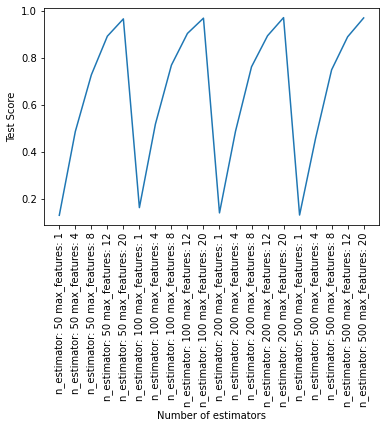

In [329]:
n_estimators = [50,100,200,500]
max_features = [1,4,8,12,20]
params=[]
scores = []

for estimator in n_estimators:
    for features in max_features:
        reg = BaggingRegressor(DecisionTreeRegressor(), \
                                max_samples=0.5, \
                                max_features=features, \
                                n_estimators=estimator, \
                               bootstrap=False, random_state=0)
        reg.fit(X_train, y_train)
        score = reg.score(X_test, y_test)
        params.append("n_estimator: "+str(estimator)+" max_features: "+str(features))
        scores.append(score)
    
plt.plot(params, scores)
plt.xlabel("Number of estimators")
plt.xticks(rotation=90)
plt.ylabel("Test Score")
plt.show()

In [330]:
tuned_parameters = {"n_estimators": [50,100,200,500],
              "max_features":[1,4,8,12,20],
              "max_samples": [0.5,0.1],
            }
DecisionTree_reg = DecisionTreeRegressor()

DecisionTree_grid = GridSearchCV(BaggingRegressor(DecisionTree,bootstrap=False, random_state=0),tuned_parameters)
DecisionTree_grid_model= DecisionTree_grid.fit(X_train, y_train)

print("DecisionTree grid model Best params: ")
print(DecisionTree_grid_model.best_params_)

print('Train Score: ',DecisionTree_grid_model.score(X_train, y_train))
print('Test Score: ',DecisionTree_grid_model.score(X_test, y_test))
y_pred = DecisionTree_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

DecisionTree grid model Best params: 
{'max_features': 20, 'max_samples': 0.5, 'n_estimators': 200}
Train Score:  0.9635742416810241
Test Score:  0.9613246394977495
MSE:  27.757827263030777


## Pasting for Ridge Regression

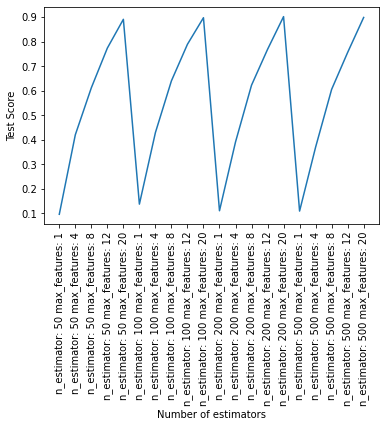

In [331]:
n_estimators = [50,100,200,500]
max_features = [1,4,8,12,20]
params=[]
scores = []

for estimator in n_estimators:
    for features in max_features:
        reg = BaggingRegressor(Ridge(max_iter=1000,alpha=1,tol=0.1,random_state=0), \
                                max_samples=0.5, \
                                max_features=features, \
                                n_estimators=estimator, \
                                random_state=0)
        reg.fit(X_train, y_train)
        score = reg.score(X_test, y_test)
        params.append("n_estimator: "+str(estimator)+" max_features: "+str(features))
        scores.append(score)
    
plt.plot(params, scores)
plt.xlabel("Number of estimators")
plt.xticks(rotation=90)
plt.ylabel("Test Score")
plt.show()

In [332]:
tuned_parameters = {"n_estimators": [50,100,200,500],
              "max_features":[1,4,8,12,20],
              "max_samples": [0.5,0.1],
            }
Ridge_reg = Ridge(max_iter=1000,alpha=1,tol=0.1,random_state=0)

Ridge_reg_grid = GridSearchCV(BaggingRegressor(Ridge_reg,bootstrap=False, random_state=0),tuned_parameters)
Ridge_reg_grid_model= Ridge_reg_grid.fit(X_train, y_train)

print("Ridge grid model Best params: ")
print(Ridge_reg_grid_model.best_params_)

print('Train Score: ',Ridge_reg_grid_model.score(X_train, y_train))
print('Test Score: ',Ridge_reg_grid_model.score(X_test, y_test))
y_pred = Ridge_reg_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

Ridge grid model Best params: 
{'max_features': 20, 'max_samples': 0.5, 'n_estimators': 200}
Train Score:  0.906163847127772
Test Score:  0.9008515158259502
MSE:  71.16020281011915


## Adaboosting for Decision Tree regressor

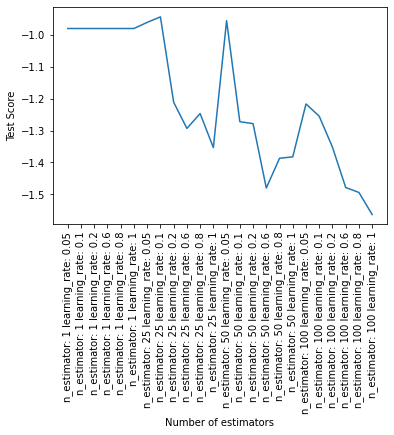

In [344]:
n_estimators = [1,25,50,100]
learning_rate = [0.05,0.1,0.2,0.6,0.8,1]
params=[]
scores = []

for estimator in n_estimators:
    for l_rate in learning_rate:
        reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3,random_state=0), \
                                 random_state=0, \
                                 n_estimators = estimator, \
                                 learning_rate = l_rate, \
                                 loss = "exponential")
        reg.fit(X, y)
        score = reg.score(X_test, y_test)
        params.append("n_estimator: "+str(estimator)+" learning_rate: "+str(l_rate))
        scores.append(score)
    
plt.plot(params, scores)
plt.xlabel("Number of estimators")
plt.xticks(rotation=90)
plt.ylabel("Test Score")
plt.show()

In [349]:
tuned_parameters = {"n_estimators": [50,100,200,500],
                    "learning_rate":[0.4,0.5,0.6,0.7,0.8,0.9]
                    }
dt = DecisionTreeRegressor(random_state=0, max_depth = 3)
dt_ada_grid = GridSearchCV(AdaBoostRegressor(dt, random_state=0),tuned_parameters)
dt_ada_grid_model = dt_ada_grid.fit(X_train,y_train)

y_pred = dt_ada_grid_model.predict(X_test)

print("Ada Boost model Best params: ")
print(dt_ada_grid_model.best_params_)

print('Train Score: ',dt_ada_grid_model.score(X_train, y_train))
print('Test Score: ',dt_ada_grid_model.score(X_test, y_test))
y_pred = dt_ada_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

Ada Boost model Best params: 
{'learning_rate': 0.9, 'n_estimators': 500}
Train Score:  0.9710837133578457
Test Score:  0.9735206242071941
MSE:  19.004604733983445


## AdaBoosting for Ridge Regression

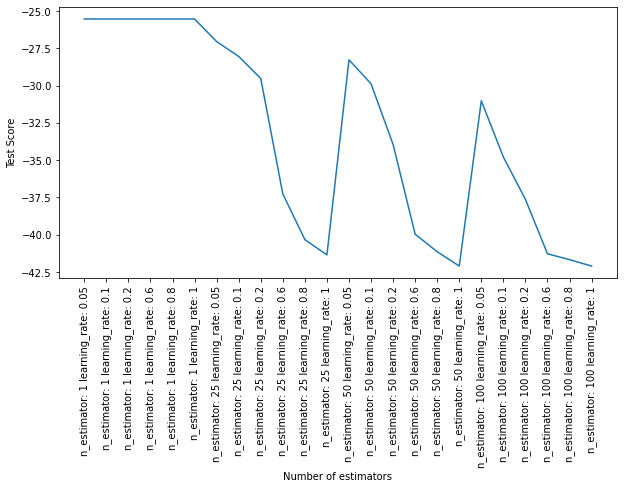

In [481]:
n_estimators = [1,25,50,100]
learning_rate = [0.05,0.1,0.2,0.6,0.8,1]
params=[]
scores = []

for estimator in n_estimators:
    for l_rate in learning_rate:
        reg = AdaBoostRegressor(Ridge(max_iter=1000,alpha=1,tol=0.1,random_state=0), \
                                 random_state=0, \
                                 n_estimators = estimator, \
                                 learning_rate = l_rate, \
                                 loss = "exponential")
        reg.fit(X, y)
        score = reg.score(X_test, y_test)
        params.append("n_estimator: "+str(estimator)+" learning_rate: "+str(l_rate))
        scores.append(score)
    
plt.plot(params, scores)
plt.xlabel("Number of estimators")
plt.xticks(rotation=90)
plt.ylabel("Test Score")
plt.show()

In [482]:
tuned_parameters = {"learning_rate":[0.05,0.1,0.2,0.6,0.8,1],
                    "n_estimators": [1,25,50,100],
                    "loss" : ["linear", "square", "exponential"]
                   }

ridge = Ridge(max_iter=1000,alpha=1,tol=0.1,random_state=0)

ridge_ada_grid = GridSearchCV(AdaBoostRegressor(ridge, random_state=0),tuned_parameters)
ridge_ada_grid_model =ridge_ada_grid.fit(X_train, y_train)

print("Ridge Adaboosting grid model Best params: ")
print(ridge_ada_grid_model.best_params_)

print('Train Score: ',ridge_ada_grid_model.score(X_train, y_train))
print('Test Score: ',ridge_ada_grid_model.score(X_test, y_test))
y_pred = ridge_ada_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))


Ridge Adaboosting grid model Best params: 
{'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 25}
Train Score:  0.9571984792133394
Test Score:  0.9607928662459506
MSE:  28.13948808984259


## Gradient Boosting

In [352]:
tuned_parameters = {"max_depth": [3,5,6,7],
                    "n_estimators": range(10,100)}

grad_boost_grid = GridSearchCV(GradientBoostingRegressor(random_state=0),tuned_parameters)
grad_boost_grid_model = grad_boost_grid.fit(X_train,y_train)

print("Gradient boosting grid model Best params: ")
print(grad_boost_grid_model.best_params_)

print('Train Score: ',grad_boost_grid_model.score(X_train, y_train))
print('Test Score: ',grad_boost_grid_model.score(X_test, y_test))
y_pred = grad_boost_grid_model.predict(X_test)
print('MSE: ',mean_squared_error(y_test, y_pred))

Gradient boosting grid model Best params: 
{'max_depth': 6, 'n_estimators': 50}
Train Score:  0.9944400524213383
Test Score:  0.9881871886053789
MSE:  8.47821387892621


## Principle Component Analysis

In [353]:
from sklearn.decomposition import PCA
pca90 = PCA(.90,random_state=0)
pca90.fit(X_train)
pca90.n_components_

13

In [354]:
pca95 = PCA(.95,random_state=0)
pca95.fit(X_train)
pca95.n_components_

16

In [355]:
pca99 = PCA(.99,random_state=0)
pca99.fit(X_train)
pca99.n_components_

20

In [356]:
X_train_without_PCA= X_train
X_test_without_PCA= X_test
X_train_pca = pca95.transform(X_train)
X_test_pca = pca95.transform(X_test)

## 1) Linear Regression

In [359]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
lreg = linear_model.LinearRegression()

lreg.fit(X_train_pca, y_train)
print('Train Score: ',lreg.score(X_train_pca, y_train))
print('Test Score: ',lreg.score(X_test_pca, y_test))
y_pred = lreg.predict(X_test_pca)
print('MSE: ',mean_squared_error(y_test, y_pred))

Train Score:  0.8721954622801829
Test Score:  0.8886373404008172
MSE:  79.9264810608796


## 2) KNN Regressor

Text(0, 0.5, 'Accuracy')

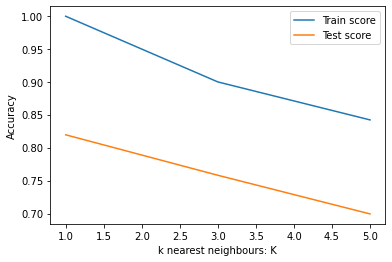

In [360]:
k_range = range(1,6,2)
train_score_knn = []
test_score_knn = []

for k in k_range:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train_pca, y_train)
    train_score_knn.append(neigh.score(X_train_pca, y_train))
    test_score_knn.append(neigh.score(X_test_pca, y_test))
    

plt.plot(k_range, train_score_knn, label = 'Train score')
plt.plot(k_range, test_score_knn, label = 'Test score')
plt.legend()
plt.xlabel('k nearest neighbours: K')
plt.ylabel('Accuracy')

In [365]:
x_range_1 = range(1,6,2)
tuned_parameters=dict(n_neighbors=x_range_1)

knn_reg = KNeighborsRegressor()
gri12=GridSearchCV(knn_reg,tuned_parameters,cv=3)
gri_model12=gri12.fit(X_train_pca,y_train)
print(gri_model12.best_params_)
y_pred12= gri_model12.score(X_test_pca,y_test)
print('Train Score: ',gri_model12.score(X_train_pca, y_train))
print('Test Score: ',gri_model12.score(X_test_pca, y_test))
y_pred = gri_model12.predict(X_test_pca)
print('MSE: ',mean_squared_error(y_test, y_pred))

{'n_neighbors': 3}
Train Score:  0.8996460766327912
Test Score:  0.7580241628707187
MSE:  173.66931818181817


## 3) Ridge Regression

Text(0.5, 0, '$\\alpha$')

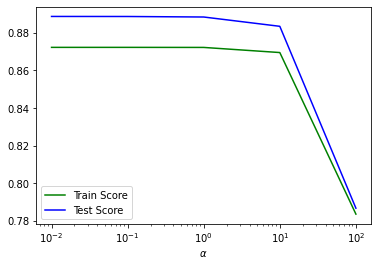

In [366]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha,random_state=0)
    ridge.fit(X_train_pca,y_train)
    train_score_list.append(ridge.score(X_train_pca,y_train))
    test_score_list.append(ridge.score(X_test_pca, y_test))

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [368]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
    
x_range = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range}]

ridge = Ridge(max_iter=1000,tol=0.1,random_state=0)
gri1=GridSearchCV(ridge,tuned_parameters,cv=5, return_train_score= True)
gri_model1=gri1.fit(X_train_pca,y_train)

print(gri1.best_params_)
y_pred1= gri1.score(X_test_pca,y_test)
print('Train Score: ',gri1.score(X_train_pca, y_train))
print('Test Score: ',gri1.score(X_test_pca, y_test))
y_pred = gri1.predict(X_test_pca)
print('MSE: ',mean_squared_error(y_test, y_pred))

{'alpha': 0.1}
Train Score:  0.8721951238628558
Test Score:  0.8886096545915178
MSE:  79.94635153919427


## 4) Lasso Regression

Text(0.5, 0, '$\\alpha$')

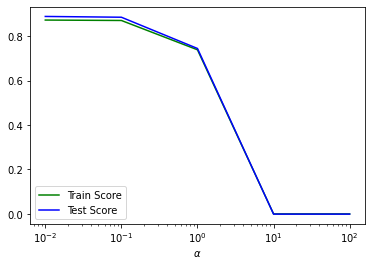

In [369]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha,random_state=0)
    lasso.fit(X_train_pca,y_train)
    train_score_list.append(lasso.score(X_train_pca,y_train))
    test_score_list.append(lasso.score(X_test_pca, y_test))
    
    
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [371]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
np.random.seed(0)
    
x_range = [0.01, 0.1, 1, 10, 100]
tuned_parameters = [{'alpha':x_range}]

lasso = Lasso(max_iter=1000,tol=0.1,random_state=0)
gri=GridSearchCV(lasso,tuned_parameters,cv=5, return_train_score= True)
gri_model=gri.fit(X_train_pca,y_train)

print(gri_model.best_params_)
y_pred= gri_model.score(X_test_pca,y_test)

print('Train Score: ',gri_model.score(X_train_pca, y_train))
print('Test Score: ',gri_model.score(X_test_pca, y_test))
y_pred = gri_model.predict(X_test_pca)
print('MSE: ',mean_squared_error(y_test, y_pred))

{'alpha': 0.01}
Train Score:  0.8721760155624898
Test Score:  0.8884354231650128
MSE:  80.07139978122514


## 5) Linear SVR

In [379]:
from sklearn import svm
from sklearn.svm import LinearSVR

tuning_parameters = [{'C': [0.01, 0.1 ,1, 10, 100], 'max_iter' : [10000]}]

lsvm_grid = GridSearchCV(svm.LinearSVR(), param_grid=tuning_parameters,cv=5,)
grid_lsvm=lsvm_grid.fit(X_train_pca,y_train) 

print('Best Paramters' ,grid_lsvm.best_params_)
print('train score: ', grid_lsvm.score(X_train_pca, y_train))
print('test score: ', grid_lsvm.score(X_test_pca, y_test))
y_pred = grid_lsvm.predict(X_test_pca)
print('MSE: ',mean_squared_error(y_test, y_pred))

Best Paramters {'C': 100, 'max_iter': 10000}
train score:  0.8644806380291638
test score:  0.8758407592573165
MSE:  89.1107597418238


## 6) SVR (Kernel = 'linear')

In [382]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

tuning_parameters = {'C':[0.1, 1,10,100], 'kernel':['linear']}

svm_grid = GridSearchCV(svm.SVR(), param_grid=tuning_parameters,cv=3)
svm_model_linear=svm_grid.fit(X_train_pca,y_train) 

print('Best Paramters' ,svm_model_linear.best_params_)
print('train score: ', svm_model_linear.score(X_train_pca, y_train))
print('test score: ', svm_model_linear.score(X_test_pca, y_test))
y_pred = svm_model_linear.predict(X_test_pca)
print('MSE: ',mean_squared_error(y_test, y_pred))

Best Paramters {'C': 100, 'kernel': 'linear'}
train score:  0.8646522550608113
test score:  0.8760270165550675
MSE:  88.97708036998827


## 7) SVR (Kernel = 'Poly')

In [385]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

tuning_parameters = {'C':[0.1, 1,10,100], 'kernel':['poly']}

svm_grid = GridSearchCV(svm.SVR(), param_grid=tuning_parameters,cv=3)
svm_model_poly=svm_grid.fit(X_train_pca,y_train) 
print(svm_model_poly.best_params_)

print('train score: ', svm_model_poly.score(X_train_pca, y_train))
print('test score: ', svm_model_poly.score(X_test_pca, y_test))
y_pred = svm_model_poly.predict(X_test_pca)
print('MSE: ',mean_squared_error(y_test, y_pred))


{'C': 10, 'kernel': 'poly'}
train score:  0.9206589466707559
test score:  0.9020394920210498
MSE:  70.30757629060035


## 8) SVR (Kernel = 'rbf')

In [386]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

tuning_parameters = {'C':[0.1, 1,10,100], 'kernel':['rbf']}

svm_grid = GridSearchCV(svm.SVR(), param_grid=tuning_parameters,cv=3)
svm_model_rbf=svm_grid.fit(X_train_pca,y_train) 
print(svm_model_rbf.best_params_)

print('train score: ', svm_model_rbf.score(X_train_pca, y_train))
print('test score: ', svm_model_rbf.score(X_test_pca, y_test))
y_pred = svm_model_rbf.predict(X_test_pca)
print('MSE: ',mean_squared_error(y_test, y_pred))


{'C': 100, 'kernel': 'rbf'}
train score:  0.965292730833164
test score:  0.9413512854924497
MSE:  42.0929725116501


## 9) Decision Tree Regressor

In [387]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeRegressor(random_state= 0), parameters, n_jobs=4)
clf.fit(X=X_train_pca, y=y_train)
print (clf.best_score_, clf.best_params_) 


print('train score: ', clf.score(X_train_pca, y_train))
print('test score: ', clf.score(X_test_pca, y_test))
y_pred = clf.predict(X_test_pca)
print('MSE: ',mean_squared_error(y_test, y_pred))

0.7710819212691694 {'max_depth': 8}
train score:  0.9399524283972479
test score:  0.7980283363638202
MSE:  144.95778393361869


## Deep Learning Model

In [466]:
X_train1 = np.asarray(X_train_without_PCA) 
X_test1 = np.asarray(X_test_without_PCA) 
y_train1 = np.asarray(y_train) 
y_test1 = np.asarray(y_test) 

In [467]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [468]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=29, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [469]:
seed = 10
np.random.seed(10)

In [470]:
model = KerasRegressor(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [471]:
grid_search_result = grid_search.fit(X, y)

In [472]:
print('Best Paramters' ,grid_search_result.best_params_)

Best Paramters {'batch_size': 10, 'epochs': 100}


In [473]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=29, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])

model.fit(X_train1, y_train1, epochs= 100, batch_size=10)

y_pred1 = model.predict(X_test1)
print(model.evaluate(X_train1,y_train1))
print(model.evaluate(X_test1,y_test1))
print(mean_squared_error(y_test1, y_pred1))

Epoch 1/100
159/159 [==============================] - 1s 2ms/step - loss: 7942.1680 - mse: 7942.1680 - mae: 85.2681
Epoch 2/100
159/159 [==============================] - 0s 1ms/step - loss: 5783.6274 - mse: 5783.6265 - mae: 71.5413
Epoch 3/100
159/159 [==============================] - 0s 1ms/step - loss: 2703.2485 - mse: 2703.2485 - mae: 45.7148
Epoch 4/100
159/159 [==============================] - 0s 2ms/step - loss: 926.6783 - mse: 926.6783 - mae: 24.2347
Epoch 5/100
159/159 [==============================] - 0s 1ms/step - loss: 463.4283 - mse: 463.4283 - mae: 16.9079
Epoch 6/100
159/159 [==============================] - 0s 2ms/step - loss: 402.9488 - mse: 402.9488 - mae: 16.2691
Epoch 7/100
159/159 [==============================] - 0s 2ms/step - loss: 387.4225 - mse: 387.4225 - mae: 16.0271
Epoch 8/100
159/159 [==============================] - 0s 2ms/step - loss: 375.0916 - mse: 375.0916 - mae: 15.7900
Epoch 9/100
159/159 [==============================] - 0s 2ms/step - loss:

159/159 [==============================] - 0s 2ms/step - loss: 32.7731 - mse: 32.7731 - mae: 4.2417
Epoch 73/100
159/159 [==============================] - 0s 1ms/step - loss: 32.5187 - mse: 32.5187 - mae: 4.2179
Epoch 74/100
159/159 [==============================] - 0s 2ms/step - loss: 32.3631 - mse: 32.3631 - mae: 4.1991
Epoch 75/100
159/159 [==============================] - 0s 2ms/step - loss: 31.8365 - mse: 31.8365 - mae: 4.1640
Epoch 76/100
159/159 [==============================] - 0s 2ms/step - loss: 31.7745 - mse: 31.7745 - mae: 4.1746
Epoch 77/100
159/159 [==============================] - 0s 2ms/step - loss: 31.4176 - mse: 31.4176 - mae: 4.1451
Epoch 78/100
159/159 [==============================] - 0s 2ms/step - loss: 31.2153 - mse: 31.2153 - mae: 4.1472
Epoch 79/100
159/159 [==============================] - 0s 2ms/step - loss: 30.9693 - mse: 30.9693 - mae: 4.1280
Epoch 80/100
159/159 [==============================] - 0s 1ms/step - loss: 30.6199 - mse: 30.6199 - mae: 4.0

In [476]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train1)
y_test_predict = model.predict(X_test1)

print('Train score: {:.2f}'.format(r2_score(y_train1, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test1, y_test_predict)))

Train score: 0.96
Test score: 0.96


## Project 1 Output

| Model | Linear Regression | Regression - KNN | Regression - Ridge | Regression - Lasso | Regression - LinearSVR | SVR Linear  Kernel | SVR Poly Kernel | SVR RBF Kernel | Decision Tree Regressor |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Parameters| default | N_Neighbors = 3 | alpha = 0.1 |  alpha = 0.01 | C = 100 | C = 100 | C = 10, Coef0 = 1 | C = 100 , Gamma = 0.1 |max_depth = 10 | 
| Training Score | 0.94 | 0.74 | 0.96 | 0.96 | 0.95 | 0.95 | 0.97 | 0.97 | 0.98 |
| Test Score | 0.94 | 0.61 | 0.96 | 0.96 | 0.96 |  0.96 | 0.97 | 0.97 | 0.97 |
| MSE | 42.943 | 275.537 | 30.221 |  29.826 | 32.000 | 31.643 | 22.791| 21.723 | 20.448

## Ensembling Output

| Model | Bagging - Decision Tree | Bagging - Ridge Regression | Pasting - Decision Tree | Pasting - Ridge Regression | Adaboost - Linear Regression | Adaboost - Ridge Regression | Gradient Boosting |
| --- | --- | --- | --- | --- | --- | --- | --- |
| Score Training | 0.96 | 0.906 | 0.963 | 0.9061 | 0.971 | 0.957 | 0.99 |
| Score Test | 0.958 | 0.9015 | 0.961 | 0.900 | 0.9735 | 0.9607 | 0.98 |
| MSE | 29.99 | 70.66 | 27.75 | 71.16 | 19.009 | 28.13 | 8.47 |

## PCA

| Model | PCA Linear Regression | PCA K Neighbor Regressor | PCA Ridge Regression | PCA Lasso Regression | PCA Linear SVR | PCA  SVM Kernel - Linear | PCA SVM Kernel - RBF | PCA SVM Kernel - Poly | PCA Decision Tree Classifier | Deep Learning 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |---|
| Score Training | 0.87 | 0.89 | 0.87 | 0.87 | 0.86 | 0.86 | 0.96 | 0.92 | 0.93 | 0.96|
| Score Test |  0.88 | 0.75 | 0.88 | 0.88 | 0.87 | 0.87 | 0.94 | 0.90 | 0.79 | 0.96|
| MSE | 79.92 | 173.66 | 79.94 | 80.07 | 89.11 | 88.977 | 42.09 | 70.30 | 144.95 | 27.93 |

Final Ouput : After carefully assesing all the ensembling, PCA and deep learning techniques we come to a conclusion that Gradient Boosting regressor is the best models to predict the target variable on the basis of their low MSE. Adaboost with Linear Regression is the second best model with 19.00 MSE and the model with the lowest MSE score is for KNN regressor with the value of 275.537.
